In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import MultiTaskLassoCV, LassoCV, MultiTaskElasticNetCV, ElasticNetCV
from sklearn.metrics import median_absolute_error  # r2_score,
import numpy as np
import pandas as pd
import os
import seaborn as sns

from SymDesignUtils import start_log
from DesignMetrics import *

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
# cluster_re_members_map
training_clusters = {'2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58': ['2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_84', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78', '2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_75', '2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_76', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_88', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_80', '2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_71', '2gtr_2dj6-DEGEN_1_2-ROT_20_28-tx_68', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_62', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_69', '2gtr_2dj6-DEGEN_1_2-ROT_20_28-tx_53', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_85', '2gtr_2dj6-DEGEN_1_2-ROT_20_28-tx_52', '2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_73'], 
                     '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236': ['2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_234', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_228', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_248', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_260', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_263', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_238', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_276', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_281', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_287', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_306', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_247', '2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_272', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_245', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_257', '2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_291', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_257', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_296', '2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_212', '2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_264', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_274', '2pd2_4n72-DEGEN_1_1-ROT_27_27-tx_203', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_241', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_286', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_301', '2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_278', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_222', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_288', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_225', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_233', '2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_285', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_255', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_263', '2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_223', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_253', '2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_299', '2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_297', '2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_225', '2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_208'], 
                     '3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413': ['3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_428', '3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_385', '3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_451', '3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_381', '3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_446', '3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_404', '3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424', '3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_355', '3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382', '3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_360', '3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346', '3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430', '3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394', '3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_386']}
training_clusters['2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58'].remove('2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_84')  # <- missing from analysis
training_clusters['2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236'].remove('2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_248')  # <- missing from analysis
training_clusters['2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236'].remove('2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_287')  # <- missing from analysis
training_clusters['3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413'].remove('3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_355')  # <- never was refined properly
training_clusters['3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413'].remove('3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_385')  # <- never was refined properly
training_clusters['3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413'].remove('3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_360')  # <- missing from analysis
training_clusters['3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413'].remove('3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_386')  # <- missing from analysis

In [5]:
analysis_file = '/home/kylemeador/designs/Total_Transformational_ClusteredPoses_AnalysisV2.csv'
train_trajectories_file = '/home/kylemeador/designs/Total_Transformational_ClusteredPoses_AnalysisV2.csv'

In [6]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
mean = 'mean'
std = 'std'

In [42]:
df = pd.read_csv(analysis_file, index_col=0, header=[0,1,2])

In [43]:
na_index = df.index[df.isna().any(axis=1)]

In [44]:
df.loc[na_index, :]

design_profile                \
                                     energy_distance          mean   
                                       no_constraint contact_count   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66        12.127269      4.962492   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_73        11.298353      4.684760   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_238        6.143352      2.876699   
2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_281             NaN           NaN   
2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_272        9.126234      3.358531   
2pd2_4n72-DEGEN_1_1-ROT_27_27-tx_203        9.089472      2.980392   
2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_301        6.658915      2.888438   
2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_278        9.490467      3.440155   
2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_263       11.322138      3.565543   
2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_297        8.079551      3.348252   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_428          8.857331      3.863492   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424         18.330303      3.422764   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382          6.878422      3.630593   

                                                           \
                                                            
                                     interface_area_total   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66           2342.442835   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_73           2026.873534   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_238           528.760747   
2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_281                  NaN   
2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_272           641.600351   
2pd2_4n72-DEGEN_1_1-ROT_27_27-tx_203           519.863538   
2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_301           500.943713   
2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_278           759.741001   
2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_263           501.838150   
2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_297           596.732094   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_428            1866.593345   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424            1674.611800   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382            1631.072507   

                                                                               \
                                                                                
                                     interface_buried_hbonds interface_energy   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                      5.6       -39.322344   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_73                      3.0       -23.559401   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_238                     0.0        -9.115090   
2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_281                     NaN              NaN   
2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_272                     0.0        -3.144541   
2pd2_4n72-DEGEN_1_1-ROT_27_27-tx_203                     0.0       -11.674760   
2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_301                     0.2        -7.116850   
2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_278                     0.0        -6.267153   
2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_263                     0.0        -5.513556   
2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_297                     0.0        -3.022294   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_428                       7.6       -25.132535   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                       9.0        -8.727907   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                       5.4        -7.162285   

                                                    \
                                                     
                                     number_hbonds   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66            8.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_73            8.0   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_238           2.0   
2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_281           NaN   
2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_272           0.8   
2pd2_4n72-DEGEN_1_1-ROT_27_27-tx_203           4.0   
2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_301           0.4   
2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_278           0.0   
2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_263           0.

In [45]:
df = df.rename_axis(columns=['protocol', 'measure', 'metric'])
print('Starting size')
display(df.shape)
# outliers = (df.loc[:, idx['pose', mean, 'int_energy_res_summary_unbound']] >= 10)  # .any(axis=1) if using multiple columns
# df = df.loc[~outliers, :]  # .any(axis=0)
# print('Removing energy outliers')
# display(df.shape)
df.dropna(inplace=True)  #, thresh= , subset=[])
# if a certain number of columns should be present add -> thresh=100, 
# if a certain column should be checked add -> subset=['nanohedra_score', 'shape_complementarity']
print('Removing missing values')
display(df.shape)

Starting size


(65, 170)

Removing missing values


(52, 170)

In [77]:
possible_lin_reg = {'MultiTaskLassoCV': MultiTaskLassoCV,
                    'LassoCV': LassoCV,
                    'MultiTaskElasticNetCV': MultiTaskElasticNetCV,
                    'ElasticNetCV': ElasticNetCV}
idx_slice = pd.IndexSlice
trajectory_df = pd.read_csv(train_trajectories_file, index_col=0, header=[0, 1, 2])
# 'dock' category is synonymous with nanohedra metrics
trajectory_df.rename(columns={'nanohedra_score_per_res': 'nanohedra_score_normalized',
                              'nanohedra_score_center_per_res_center': 'nanohedra_score_center_normalized',
                              'divergence_design_per_res': 'divergence_design_per_residue', 
                              'divergence_evolution_per_res': 'divergence_evolution_per_residue',
                              'divergence_fragment_per_res': 'divergence_fragment_per_residue', 
                              'divergence_interface_per_res': 'divergence_interface_per_residue',
                              'interface_b_factor_per_res': 'interface_b_factor_per_residue'
                             }, inplace=True, errors='ignore')
trajectory_df.drop([('pose', 'dock', 'total_interface_residues')], axis=1, inplace=True)  # Temporary patch to remove inaccurate duplicate
trajectory_df = trajectory_df.loc[:, idx_slice[['pose', 'no_constraint'],
                                               ['mean', 'dock', 'seq_design'], :]].droplevel(1, axis=1)

In [61]:
trajectory_df.drop(['3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_385',], inplace=True)  # '3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_355'

KeyError: "['3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_385'] not found in axis"

In [57]:
# trajectory_df.rename(columns={'int_composition_similarity': 'interface_composition_similarity'}, inplace=True)
# trajectory_df.to_csv(train_trajectories_file)

In [71]:
trajectory_df

pose             \
                                    contact_count       core   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66      4.936381  42.666667   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72      4.898162  43.600000   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89      5.026973  44.833333   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68      4.961023  42.500000   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78      5.014050  45.666667   
...                                           ...        ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424       3.804022  31.500000   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382       3.596525  32.666667   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346       3.761460  33.000000   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430       3.779851  33.666667   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394       3.824276  34.166667   

                                                          \
                                    favor_residue_energy   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                  0.0   
...                                                  ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                   0.0   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                   0.0   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                   0.0   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                   0.0   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                   0.0   

                                                                      \
                                    interface_composition_similarity   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                         0.443637   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                         0.422474   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                         0.457116   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                         0.524572   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                         0.436394   
...                                                              ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                          0.391635   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                          0.456993   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                          0.425765   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                          0.451898   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                          0.428018   

                                                                \
                                    interaction_energy_complex   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                 -82.489193   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                 -77.711008   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                 -84.681658   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                 -84.972209   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                 -83.167197   
...                                                        ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                  -51.973663   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                  -53.891090   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                  -48.906503   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                  -55.183138   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                  -53.025932   

                                                                \
                                    interface_area_hydrophobic   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                1895.809329   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                1931.910503   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                1935.288939   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                1964.797807   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                2096.704980   
...                                                        ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                 1316.751340   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382       

In [108]:
numerical_trajectory_df = trajectory_df.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna(axis=1)
trajectory_df = numerical_trajectory_df

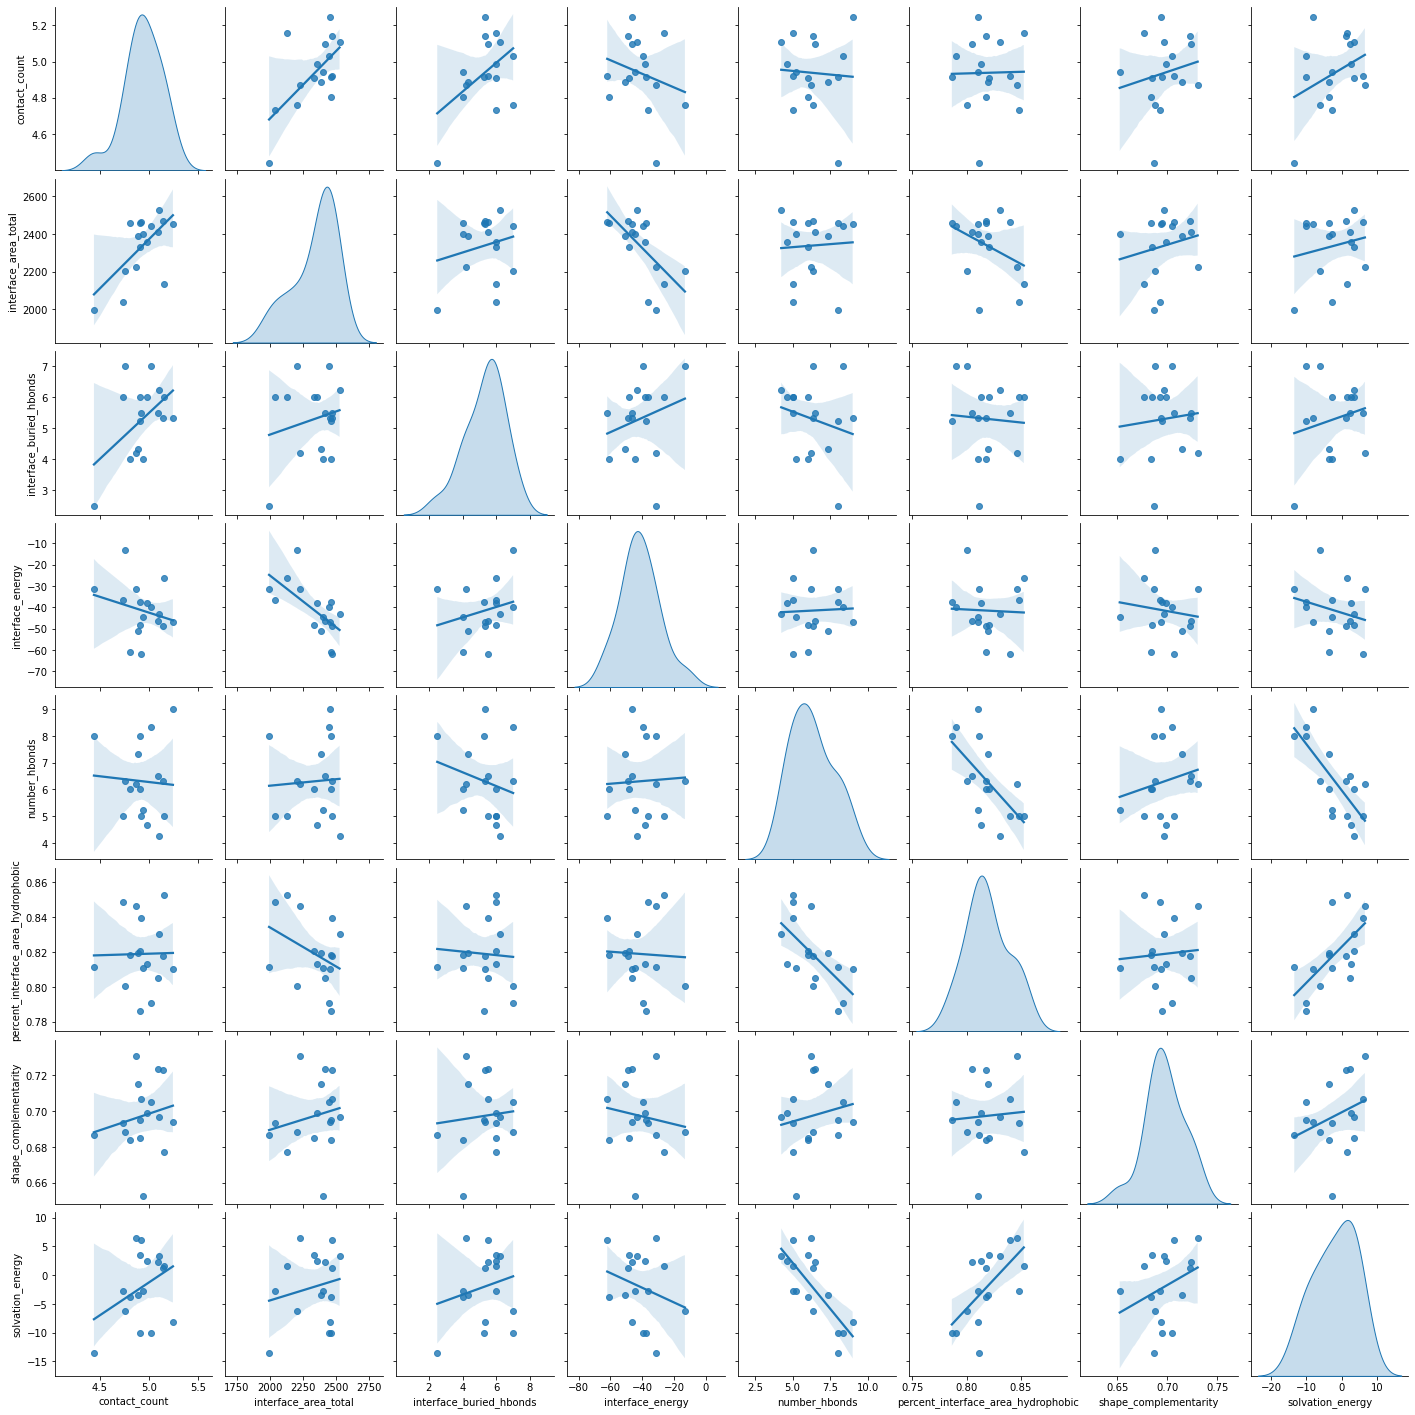

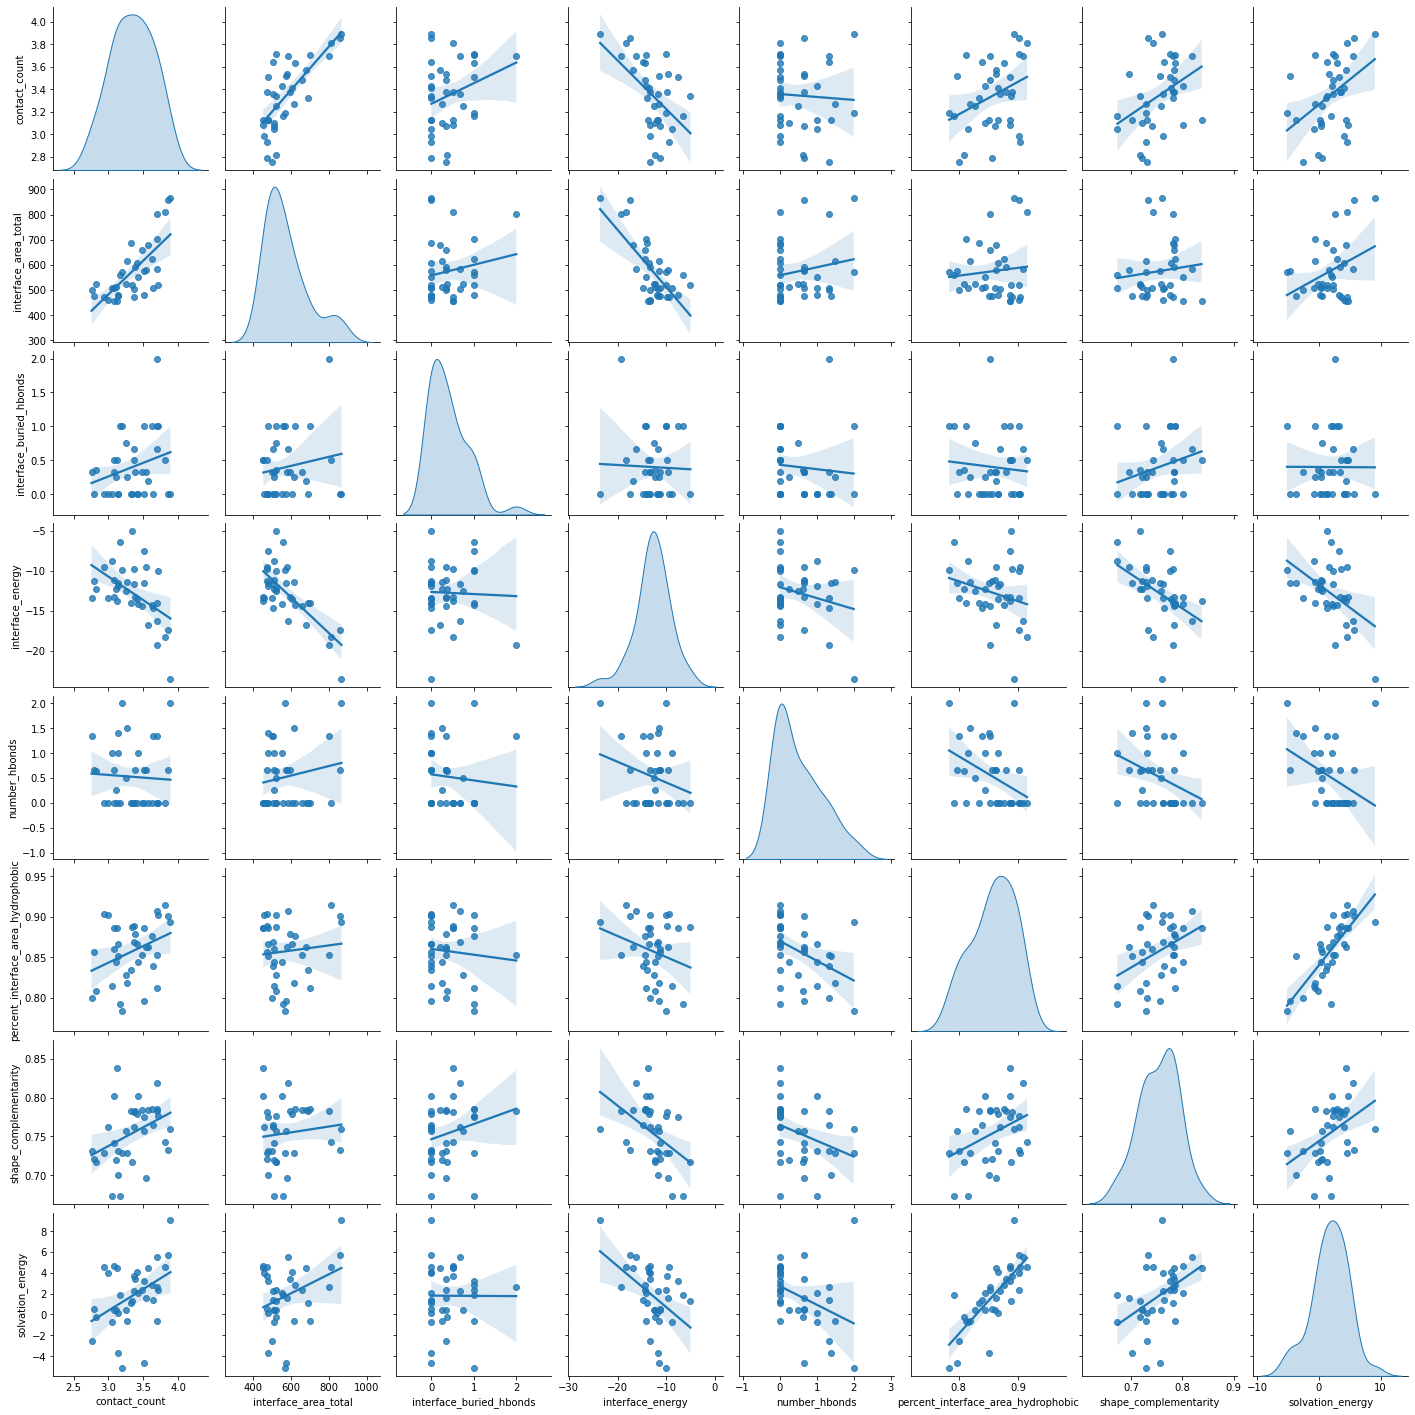

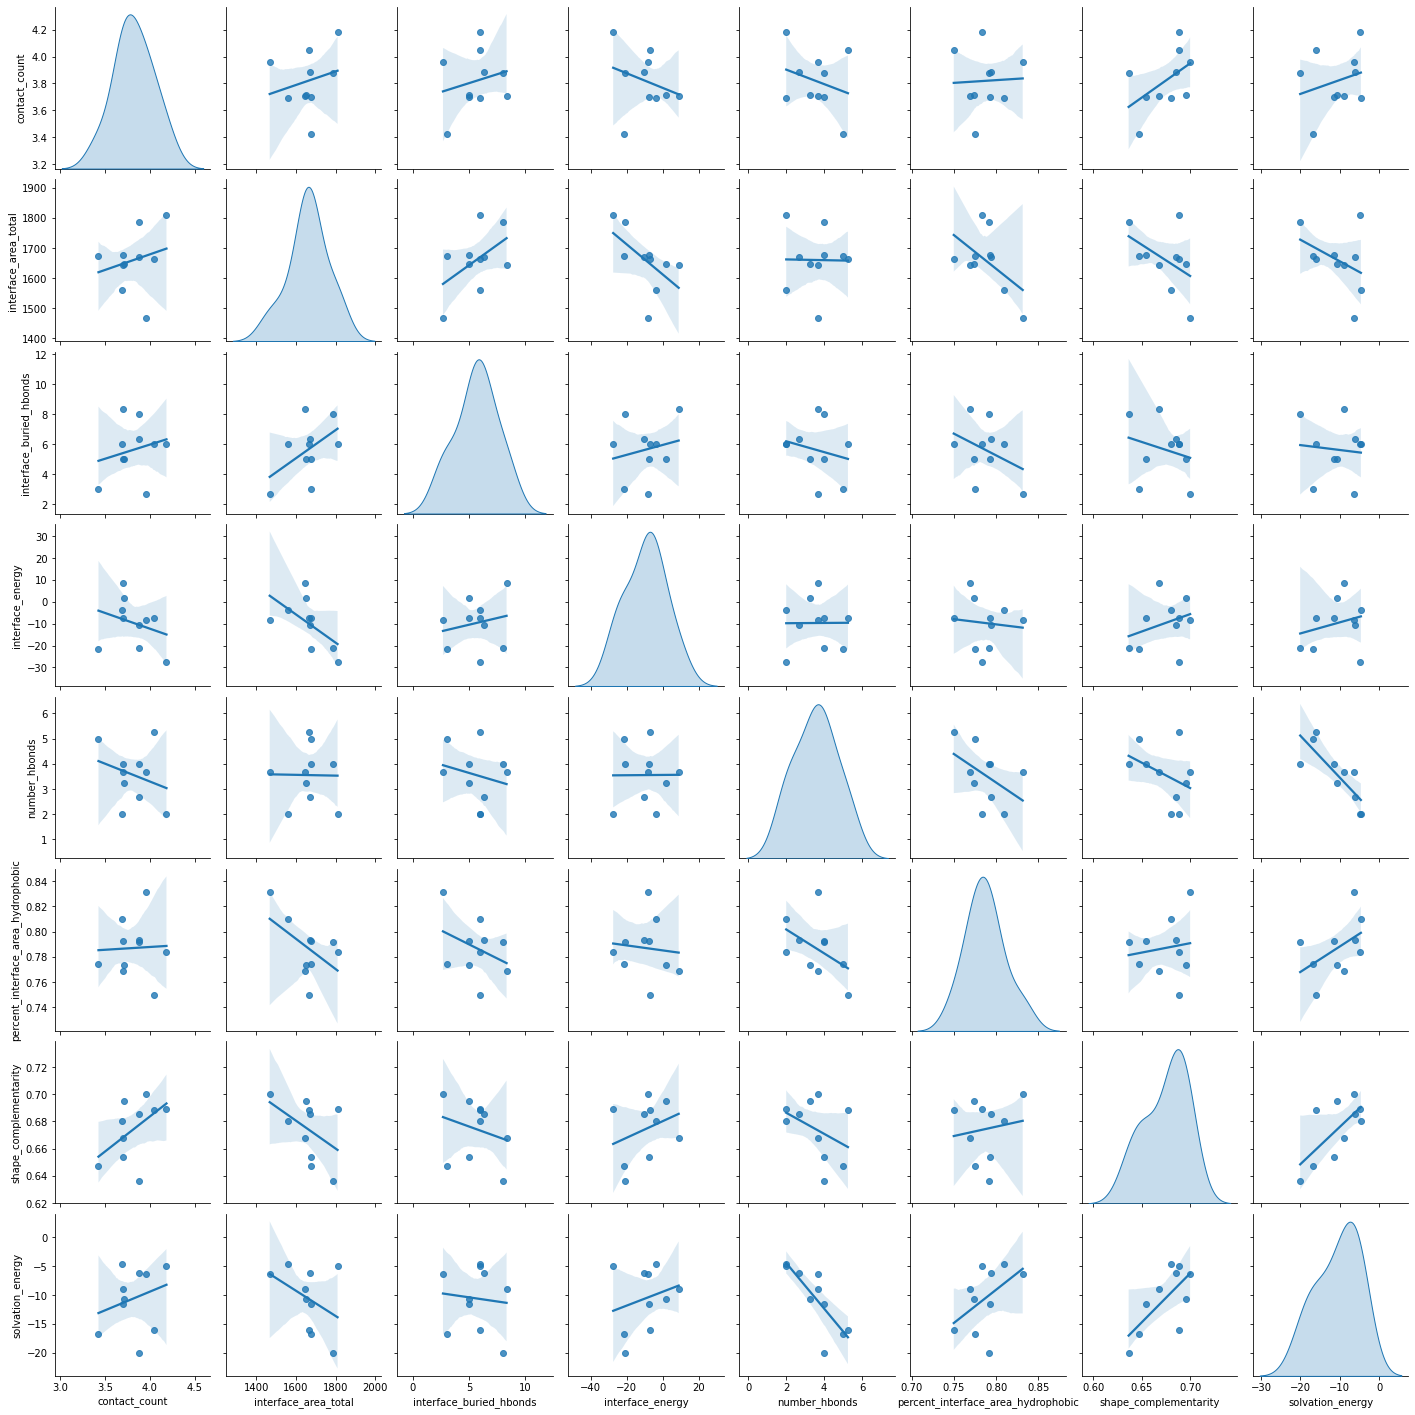

In [95]:
for cluster_members in training_clusters.values():
    _ = sns.pairplot(numerical_trajectory_df.loc[cluster_members, idx_slice['no_constraint', :]].droplevel(0, axis=1), kind='reg', diag_kind='kde')

In [109]:
nanohedra_metrics = ['nanohedra_score_normalized', 'nanohedra_score_center_normalized', 'nanohedra_score',
                     'nanohedra_score_center', 'number_fragment_residues_total', 'number_fragment_residues_center',
                     'multiple_fragment_ratio', 'percent_fragment_helix', 'percent_fragment_strand',
                     'percent_fragment_coil', 'number_of_fragments', 'total_interface_residues',
                     'total_non_fragment_interface_residues', 'percent_residues_fragment_total',
                     'percent_residues_fragment_center']

In [93]:
# incase that the different objectives of the MultiTask regression models are fitting negative 
# and positive values in oposing ways I am including this to invert all values in the trajectory_df 
#that have a more preferrable value at the smallest scale (ie. energy is negative)
filter_df = pd.DataFrame(master_metrics)
# print(sorted(trajectory_df.columns.get_level_values(-1)))
invert_scale = {'max': 1, 'min': -1, None: None} 
inversion_s = pd.Series({(pose_type, metric): invert_scale[filter_df.loc['direction', metric]]  # pd.concat([]
                         for pose_type, metric in trajectory_df.columns})  # .get_level_values(-1).tolist()})
# inversion_s.index = pd.MultiIndex.from_arrays([trajectory_df.columns.get_level_values(0), inversion_s.index])
#                         keys=[trajectory_df.columns.get_level_values(0).tolist()])
# display(inversion_s)
# int_trajectory_df = trajectory_df.copy()  # [trajectory_df.columns.droplevel(0)]
# int_trajectory_df.columns = trajectory_df.columns.droplevel(0)
# display(int_trajectory_df)
inversion_trajectory_df = trajectory_df.multiply(inversion_s, axis=1)
display(inversion_trajectory_df)

pose             \
                                    contact_count       core   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66      4.936381  42.666667   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72      4.898162  43.600000   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89      5.026973  44.833333   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68      4.961023  42.500000   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78      5.014050  45.666667   
...                                           ...        ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424       3.804022  31.500000   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382       3.596525  32.666667   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346       3.761460  33.000000   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430       3.779851  33.666667   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394       3.824276  34.166667   

                                                          \
                                    favor_residue_energy   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                  0.0   
...                                                  ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                   0.0   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                   0.0   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                   0.0   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                   0.0   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                   0.0   

                                                                      \
                                    interface_composition_similarity   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                         0.443637   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                         0.422474   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                         0.457116   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                         0.524572   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                         0.436394   
...                                                              ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                          0.391635   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                          0.456993   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                          0.425765   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                          0.451898   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                          0.428018   

                                                                \
                                    interaction_energy_complex   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                 -82.489193   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                 -77.711008   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                 -84.681658   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                 -84.972209   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                 -83.167197   
...                                                        ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                  -51.973663   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                  -53.891090   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                  -48.906503   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                  -55.183138   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                  -53.025932   

                                                                \
                                    interface_area_hydrophobic   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                1895.809329   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                1931.910503   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                1935.288939   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                1964.797807   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                2096.704980   
...                                                        ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                 1316.751340   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382       

pose             \
                                    contact_count       core   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66      4.936381  42.666667   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72      4.898162  43.600000   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89      5.026973  44.833333   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68      4.961023  42.500000   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78      5.014050  45.666667   
...                                           ...        ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424       3.804022  31.500000   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382       3.596525  32.666667   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346       3.761460  33.000000   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430       3.779851  33.666667   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394       3.824276  34.166667   

                                                          \
                                    favor_residue_energy   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                  0.0   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                  0.0   
...                                                  ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                   0.0   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                   0.0   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                   0.0   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                   0.0   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                   0.0   

                                                                      \
                                    interface_composition_similarity   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                         0.443637   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                         0.422474   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                         0.457116   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                         0.524572   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                         0.436394   
...                                                              ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                          0.391635   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                          0.456993   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                          0.425765   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                          0.451898   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                          0.428018   

                                                                \
                                    interaction_energy_complex   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                  82.489193   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                  77.711008   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                  84.681658   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                  84.972209   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                  83.167197   
...                                                        ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                   51.973663   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                   53.891090   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                   48.906503   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                   55.183138   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                   53.025932   

                                                                \
                                    interface_area_hydrophobic   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66               -1895.809329   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72               -1931.910503   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89               -1935.288939   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68               -1964.797807   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78               -2096.704980   
...                                                        ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                -1316.751340   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382       

In [112]:
# scale the data to a standard gaussian distribution for each trajectory independently
# Todo ensure this mechanism of scaling is correct for each cluster individually
scaler = StandardScaler()
scaled_np = [pd.DataFrame(scaler.fit_transform(trajectory_df.loc[cluster_members, :]), index=trajectory_df.loc[cluster_members, :].index)
             for cluster_members in training_clusters.values()]
# train_traj_df = pd.DataFrame()
# train_traj_df[trajectory_df.columns] = scaled_np
train_traj_df = pd.concat(scaled_np, keys=list(training_clusters.keys()), axis=0)
train_traj_df.columns = trajectory_df.columns
display(train_traj_df)
# display(trajectory_df)
# train_traj_df.index = trajectory_df.index
# train_traj_df = pd.concat([train_traj_df], keys=list(training_clusters.keys()), axis=0)
# train_traj_df = pd.concat([scaler.fit_transform(trajectory_df.loc[cluster_members, :])
#                           for cluster_members in training_clusters.values()], keys=list(training_clusters.keys()),
#                           axis=0)

pose  \
                                                                        contact_count   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66      0.453125   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72      0.207194   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89      1.036066   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68      0.611693   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78      0.952909   
...                                                                               ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424      -0.186348   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382      -1.815148   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346      -0.520446   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430      -0.376083   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394      -0.027354   

                                                                                   \
                                                                             core   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66  0.117828   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72  0.395483   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89  0.762384   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68  0.068247   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78  1.010291   
...                                                                           ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424  -0.351991   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382   0.161329   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346   0.307992   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430   0.601318   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394   0.821312   

                                                                                              \
                                                                        favor_residue_energy   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                  0.0   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                  0.0   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                  0.0   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                  0.0   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                  0.0   
...                                                                                      ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                   0.0   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                   0.0   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                   0.0   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                   0.0   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                   0.0   

                                                                                                          \
                                                                        interface_composition_similarity   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                        -0.887466   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                        -1.281342   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                        -0.636629   
                            

### Repeat the scaling for the inverted DF

In [94]:
# scale the data to a standard gaussian distribution for each trajectory independently
# Todo ensure this mechanism of scaling is correct for each cluster individually
inversion_scaled_np = [pd.DataFrame(scaler.fit_transform(inversion_trajectory_df.loc[cluster_members, :]), 
                                    index=inversion_trajectory_df.loc[cluster_members, :].index)
                       for cluster_members in training_clusters.values()]
# train_traj_df = pd.DataFrame()
# train_traj_df[trajectory_df.columns] = scaled_np
inv_train_traj_df = pd.concat(inversion_scaled_np, keys=list(training_clusters.keys()), axis=0)
inv_train_traj_df.columns = inversion_trajectory_df.columns
display(inv_train_traj_df)
# display(trajectory_df)
# train_traj_df.index = trajectory_df.index
# train_traj_df = pd.concat([train_traj_df], keys=list(training_clusters.keys()), axis=0)
# train_traj_df = pd.concat([scaler.fit_transform(trajectory_df.loc[cluster_members, :])
#                           for cluster_members in training_clusters.values()], keys=list(training_clusters.keys()),
#                           axis=0)

/home/kylemeador/miniconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/kylemeador/miniconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)
/home/kylemeador/miniconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/kylemeador/miniconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)
/home/kylemeador/miniconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/kylemeador/miniconda3/lib/python3.7/site

pose  \
                                                                        contact_count   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66      0.453125   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72      0.207194   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89      1.036066   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68      0.611693   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78      0.952909   
...                                                                               ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424      -0.186348   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382      -1.815148   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346      -0.520446   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430      -0.376083   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394      -0.027354   

                                                                                   \
                                                                             core   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66  0.117828   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72  0.395483   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89  0.762384   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68  0.068247   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78  1.010291   
...                                                                           ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424  -0.351991   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382   0.161329   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346   0.307992   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430   0.601318   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394   0.821312   

                                                                                              \
                                                                        favor_residue_energy   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                  0.0   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                  0.0   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                  0.0   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                  0.0   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                  0.0   
...                                                                                      ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                   0.0   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                   0.0   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                   0.0   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                   0.0   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                   0.0   

                                                                                                          \
                                                                        interface_composition_similarity   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                        -0.887466   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                        -1.281342   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                        -0.636629   
                            

In [113]:
# standard_scale_traj_df[train_traj_df.columns] = standard_scale.transform(train_traj_df)

# select the metrics which the linear model should be trained on
nano_traj = train_traj_df.loc[:, idx_slice[:, nanohedra_metrics]]
inv_nano_traj = inv_train_traj_df.loc[:, idx_slice[:, nanohedra_metrics]]

In [114]:
display(nano_traj)
display(inv_nano_traj)

pose  \
                                                                        nanohedra_score_normalized   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                   0.903287   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                   1.237275   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                   1.198917   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                   0.166221   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                   1.281726   
...                                                                                            ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                   -0.089068   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                   -0.119524   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                   -0.419352   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                    0.290579   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                   -0.956487   

                                                                                                           \
                                                                        nanohedra_score_center_normalized   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                          0.781328   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                          1.346699   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                          1.253394   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                          0.468317   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                          1.337087   
...                                                                                                   ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                           0.215160   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                           0.332468   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                          -1.001175   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                           0.034227   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                          -1.708097   

                                                                                         \
                                                                        nanohedra_score   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66        0.900408   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72        1.373253   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89        1.318947   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68        0.968811   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78        1.436184   
...                                                                                 ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424         0.579999   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382        -0.250216   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346        -1.331417   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430        -0.603573   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394        -1.437861   

                                                                                                \
                                                                   

pose  \
                                                                        nanohedra_score_normalized   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                   0.903287   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                   1.237275   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                   1.198917   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                   0.166221   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                   1.281726   
...                                                                                            ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                   -0.089068   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                   -0.119524   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                   -0.419352   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                    0.290579   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                   -0.956487   

                                                                                                           \
                                                                        nanohedra_score_center_normalized   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                          0.781328   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                          1.346699   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                          1.253394   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                          0.468317   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                          1.337087   
...                                                                                                   ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                           0.215160   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                           0.332468   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                          -1.001175   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                           0.034227   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                          -1.708097   

                                                                                         \
                                                                        nanohedra_score   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58 2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66        0.900408   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72        1.373253   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89        1.318947   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68        0.968811   
                                    2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78        1.436184   
...                                                                                 ...   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413  3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424         0.579999   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382        -0.250216   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346        -1.331417   
                                    3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430        -0.603573   
                                    3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394        -1.437861   

                                                                                                \
                                                                   

In [137]:
# select the Rosetta metrics to train model on
# potential_training_metrics = set(train_traj_df.columns).difference(nanohedra_metrics)
# rosetta_select_metrics = query_user_for_metrics(potential_training_metrics, mode='design', level='pose')
rosetta_metrics = {'shape_complementarity': StandardScaler(),  # I think a gaussian dist is preferable to MixMax
                   # 'protocol_energy_distance_sum': 0.25,  This will select poses by evolution
                   'interface_composition_similarity': StandardScaler(),  # gaussian preferable to MixMax
                   'interface_energy': StandardScaler(),  # gaussian preferable to MaxAbsScaler,
                   # 'observed_evolution': 0.25}  # also selects by evolution
                   'rmsd': StandardScaler(),
                   'solvation_energy': StandardScaler()}
# Assign each metric a weight proportional to it's share of the total weight
rosetta_select_metrics = {item: 1 / len(rosetta_metrics) for item in rosetta_metrics}

## Select the oriented DF and the desired metrics for the training

In [129]:
selected_train_traj_df = inv_train_traj_df
selected_nano_traj_df = inv_nano_traj

In [138]:
# for proper MultiTask model training, must scale the selected metrics. This is performed on trajectory_df above
# targets2d = train_traj_df.loc[:, rosetta_select_metrics.keys()]
# Have to concatenate the df from the selected columns since they come from different protocols
pose_traj_df = selected_train_traj_df.loc[:, idx_slice['pose', ['interface_composition_similarity', 'rmsd']]]
no_constraint_traj_df = \
    selected_train_traj_df.loc[:, idx_slice['no_constraint',
                                            set(rosetta_metrics.keys()).difference(['interface_composition_similarity', 'rmsd'])]]
targets2d = pd.concat([pose_traj_df, no_constraint_traj_df], axis=1).droplevel(0, axis=1)
targets2d_for_filter = pd.concat([targets2d], keys=[('pose', 'extra')], axis=1).droplevel(0)  # remove index multiaxis, add column extra axis
display(targets2d_for_filter)

pose  \
                                                               extra   
                                    interface_composition_similarity   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                        -0.887466   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                        -1.281342   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                        -0.636629   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                         0.618789   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                        -1.022272   
...                                                              ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                         -0.998879   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                          0.579089   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346                         -0.174861   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                          0.456079   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394                         -0.120475   

                                                                     \
                                                                      
                                         rmsd shape_complementarity   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66 -0.934476             -0.730435   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72  0.017190             -0.677307   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89  0.044911             -0.197417   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68  1.051053              1.383018   
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78 -1.774419             -0.023448   
...                                       ...                   ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424   0.130228              0.699601   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382   0.188793             -1.320135   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346  -1.777435              1.007979   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430  -0.270115             -0.976294   
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394  -1.008833              0.275927   

                                                                       
                                                                       
                                    solvation_energy interface_energy  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66         0.302089         1.635334  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72        -0.930475         0.574223  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89         1.062687         0.442530  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68        -0.550316         0.633082  
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78        -0.920790         0.144913  
...                                              ...              ...  
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424         -1.093404         1.690176  
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382          1.183335         1.125539  
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_346          0.011063        -1.085304  
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430          0.176577        -0.208658  
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394         -1.157358        -0.572939  

[64 rows x 5 columns]

In [139]:
# Weighting scheme inherently standardizes the weights between [0, 1] by taking a linear combination of the metrics
# for cluster_members in training_clusters.values():
#     selected_index_plus_target_df = filter_pose(trajectory_df.loc[cluster_members, :], weight=rosetta_select_metrics)
df_plus_target = pd.concat([filter_pose(targets2d_for_filter.loc[cluster_members, :], weight=rosetta_select_metrics) 
                            for cluster_members in training_clusters.values()])

# df_plus_target_one_rank = filter_pose(train_trajectories_file, weight=rosetta_select_metrics)  # weight=True)
# I realized that the selection of the individual pose sum was not being segregated for each trajectory. This should be done to find the trajectory low
target = df_plus_target[('pose', 'sum', 'selection_weight')]  # weight=True)
display(target)

[DesignMetrics]-INFO: Number of starting designs = 17
[DesignMetrics]-INFO: Number of starting designs = 17
[DesignMetrics]-INFO: Number of starting designs = 17
[DesignMetrics]-INFO: Number of starting designs = 17
[DesignMetrics]-INFO: Number of starting designs = 17
[DesignMetrics]-INFO: Number of starting designs = 17
[DesignMetrics]-INFO: Number of starting designs = 17
[DesignMetrics]-INFO: Number of starting designs = 17
[DesignMetrics]-INFO: Number of starting designs = 17
[DesignMetrics]-INFO: Number of starting designs = 17
[DesignMetrics]-INFO: Number of starting designs = 17
[DesignMetrics]-INFO: Number of starting designs = 17
[DesignMetrics]-INFO: Number of starting designs = 17
[DesignMetrics]-INFO: Using weighting parameters: {'shape_complementarity': 0.2, 'interface_composition_similarity': 0.2, 'interface_energy': 0.2, 'rmsd': 0.2, 'solvation_energy': 0.2}
[DesignMetrics]-INFO: Using weighting parameters: {'shape_complementarity': 0.2, 'interface_composition_similarit

2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_73    0.882353
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_76    0.717647
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_62    0.694118
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_85    0.623529
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78    0.611765
                                         ...   
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430     0.540000
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_381     0.500000
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_451     0.440000
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382     0.380000
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_428     0.160000
Name: (pose, sum, selection_weight), Length: 64, dtype: float64

In [31]:
# one_rank_target = df_plus_target_one_rank[('pose', 'sum', 'selection_weight')]
display(one_rank_target)

2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_278    0.693750
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_69     0.665625
2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_291    0.656250
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_253    0.634375
2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_223    0.625000
                                          ...   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_225    0.378125
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_451      0.350000
2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_263    0.340625
2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_272    0.287500
2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_297    0.256250
Name: (pose, sum, selection_weight), Length: 64, dtype: float64

## Without RMSD as selection metric
The result without RMSD seems worse as far as a normal distribution. I think including it, however slight the benefit, seems to be a good measure

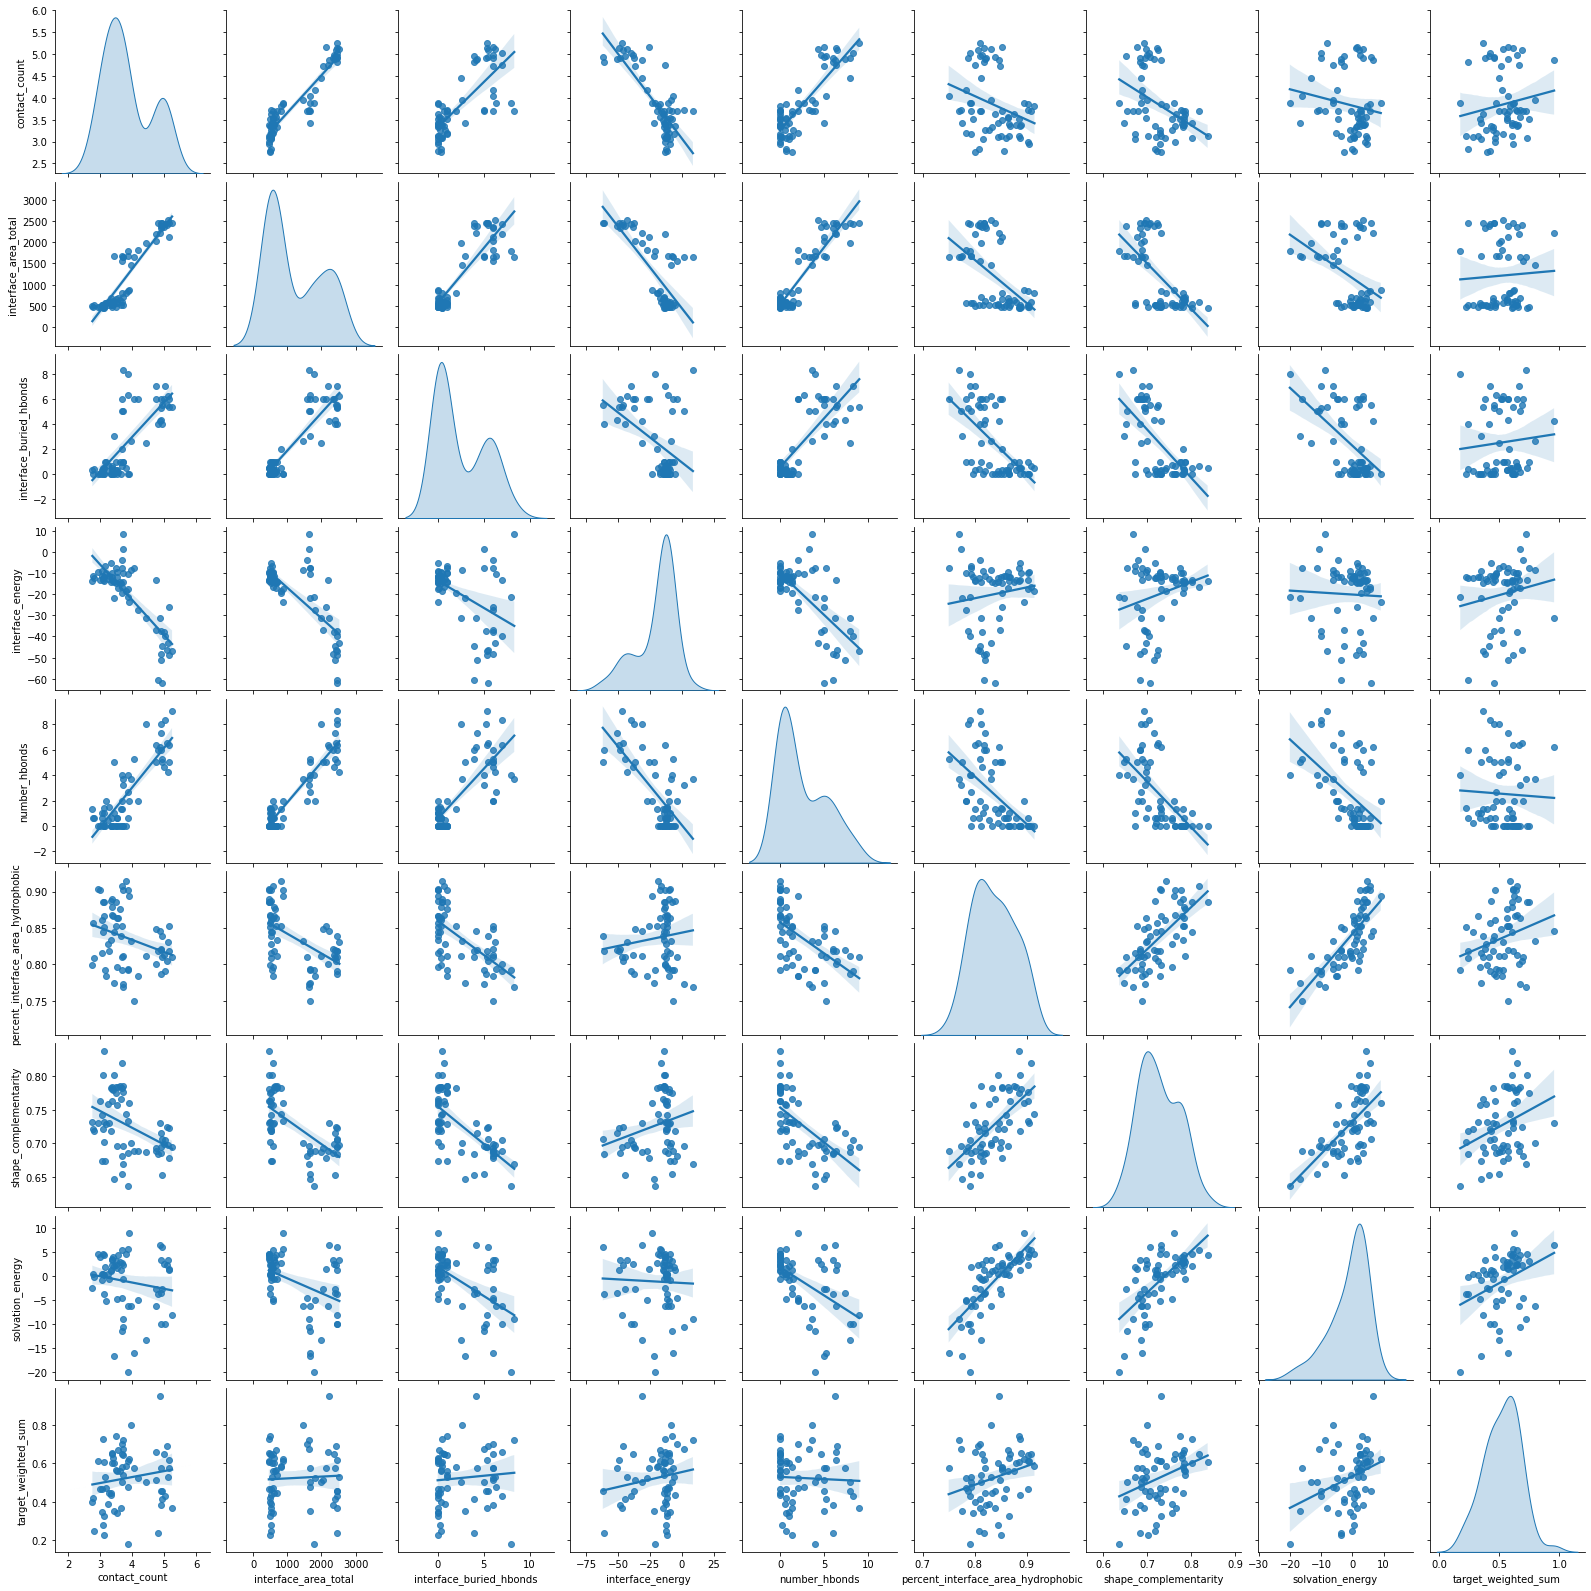

In [133]:
# for cluster_members in training_clusters.values():
target_and_numerical_trajectory_df = numerical_trajectory_df.copy()
target_and_numerical_trajectory_df[('no_constraint', 'target_weighted_sum')] = target
# target_and_numerical_trajectory_df = pd.concat([numerical_trajectory_df, target], axis=1)

_ = sns.pairplot(target_and_numerical_trajectory_df.loc[:, idx_slice['no_constraint', :]].droplevel(0, axis=1), kind='reg', diag_kind='kde')

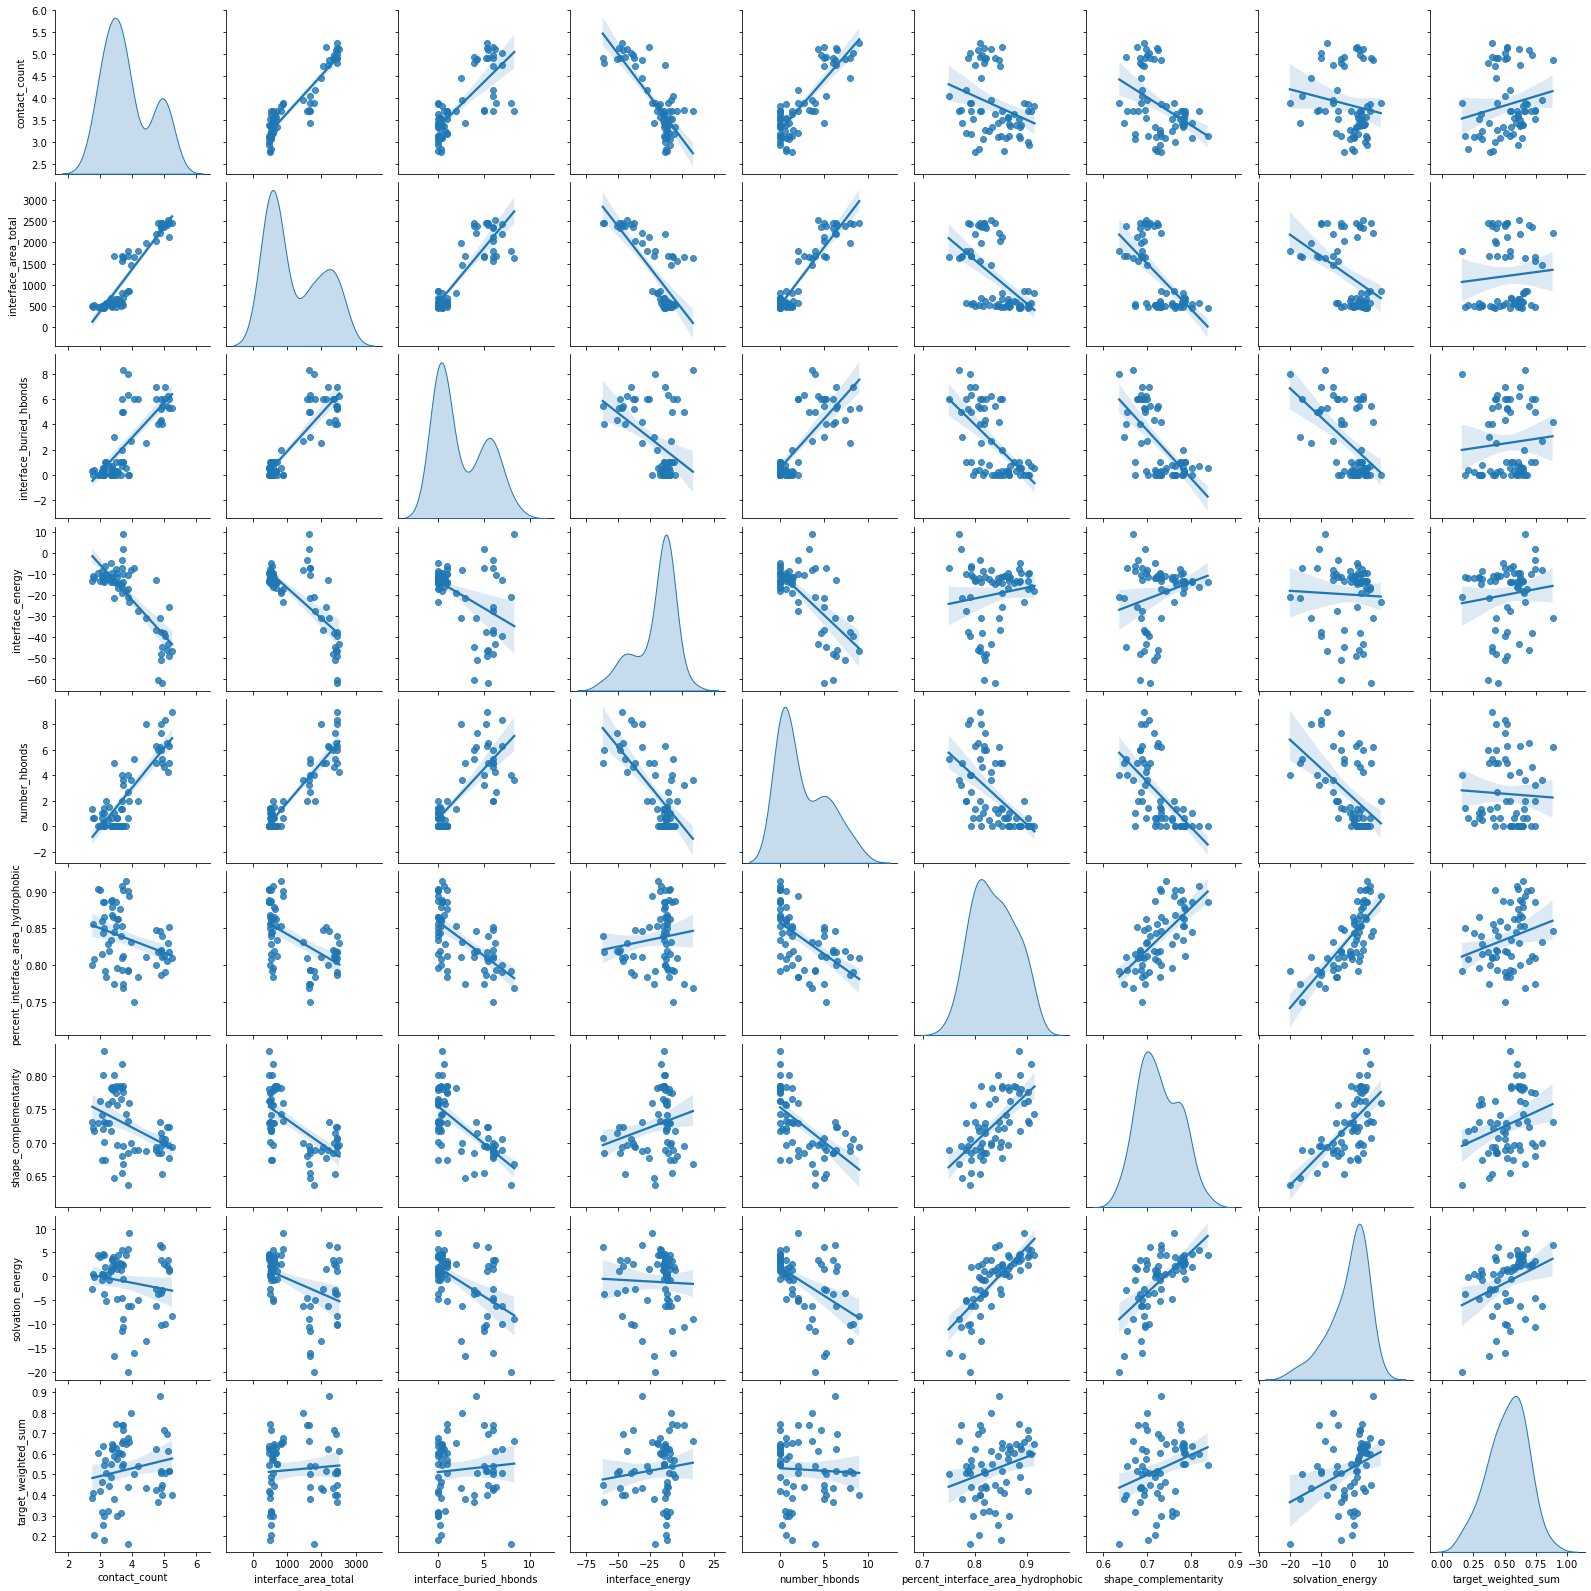

In [127]:
# for cluster_members in training_clusters.values():
target_and_numerical_trajectory_df = numerical_trajectory_df.copy()
target_and_numerical_trajectory_df[('no_constraint', 'target_weighted_sum')] = target
# target_and_numerical_trajectory_df = pd.concat([numerical_trajectory_df, target], axis=1)

_ = sns.pairplot(target_and_numerical_trajectory_df.loc[:, idx_slice['no_constraint', :]].droplevel(0, axis=1), kind='reg', diag_kind='kde')

In [140]:
# split training and test dataset
trajectory_train, trajectory_test, target_train, target_test = train_test_split(selected_nano_traj_df, target, random_state=42)
trajectory_train2d, trajectory_test2d, target_train2d, target_test2d = train_test_split(selected_nano_traj_df, targets2d,
                                                                                        random_state=42)

In [119]:
display(trajectory_train)

pose  \
                                                                          nanohedra_score_normalized   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_68                    0.166221   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_234                   1.181511   
                                     2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236                  -1.337711   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_80                   -0.537786   
                                     2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_76                    0.976401   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_264                  -0.361711   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_78                    1.281726   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_223                  -1.968247   
                                     2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_260                   1.119039   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413   3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_428                     0.725708   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_288                   0.054368   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413   3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_451                     1.631283   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_296                   1.022911   
                                     2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_257                   0.275272   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413   3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                    -0.089068   
                                     3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_382                    -0.119524   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gtr_2dj6-DEGEN_1_2-ROT_20_28-tx_52                   -1.412087   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_245                   0.327833   
                                     2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_272                  -0.783618   
                                     2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_306                   1.086285   
                                     2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_263                   0.491551   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_62                   -1.251595   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_212                  -2.135742   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413   3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_446                    -0.428071   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_255                  -0.082977   
                                     2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_286                   0.272099   
                                     2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_291                  -0.888360   
                                     2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_233                  -0.919057   
                                     2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_253                  -0.184304   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                    1.237275   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_238                   0.937460   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_89                    1.198917   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413   3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_430                     0.290579   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_278                  -0.462836   
                                     2pd2_4n72-DEGEN_1_1-ROT_27_27-tx_203                   0.391814   
                                     2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_281                   1.719528   
                                     2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_208                  -1.953901   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gt

In [120]:
print(trajectory_train.shape, trajectory_test.shape)
print(target_train.shape, target_test.shape)
display(target_test)

(48, 15) (16, 15)
(48,) (16,)


2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236    0.205405
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424      0.540000
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_73     0.882353
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_234    0.410811
2gtr_2dj6-DEGEN_1_2-ROT_20_28-tx_68     0.517647
2pd2_4n72-DEGEN_1_1-ROT_30_24-tx_291    0.551351
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66     0.364706
2gtr_2dj6-DEGEN_1_2-ROT_20_28-tx_52     0.435294
2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_281    0.637838
3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_451      0.440000
3l3s_4g9q-DEGEN_1_1-ROT_8_2-tx_394      0.740000
2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_69     0.505882
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_225    0.486486
2gtr_2dj6-DEGEN_1_2-ROT_20_28-tx_53     0.423529
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_255    0.572973
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_245    0.297297
Name: (pose, sum, selection_weight), dtype: float64

In [141]:
# Calculate model performance with cross-validation, alpha tuning
alphas = np.logspace(-10, 10, 21)  # Todo why log space here? BETTER parameter space
l1_ratios = [.1, .5, .7, .9, .95, .99, 1]
# then compare between models based on various model scoring parameters
reg_scores, mae_scores = [], []
models = []
for lin_reg, model in possible_lin_reg.items():
    if lin_reg.startswith('MultiTask'):
        trajectory_train_, trajectory_test_ = trajectory_train2d, trajectory_test2d
        target_train_, target_test_ = target_train2d, target_test2d
        print('MultiTask Model: %s' % lin_reg)
    else:
        trajectory_train_, trajectory_test_ = trajectory_train, trajectory_test
        target_train_, target_test_ = target_train, target_test
        print('Model: %s' % lin_reg)
    # else:
    #     target = target_train
    if lin_reg.startswith('ElasticNetCV'):
        test_reg = model(alphas=alphas, max_iter=10000, l1_ratio=l1_ratios).fit(trajectory_train_, target_train_)  # fit_intercept=False,
    else:
        test_reg = model(alphas=alphas, max_iter=10000).fit(trajectory_train_, target_train_)   # fit_intercept=False,
    reg_scores.append(test_reg.score(trajectory_train_, target_train_))
    target_test_prediction = test_reg.predict(trajectory_test_)  # target_test
    # for MultiTask, the median_absolute_error is a weighted average of all Task errors. multioutput='raw_values’ would provide each
    mae_scores.append(median_absolute_error(target_test_, target_test_prediction))
    models.append(test_reg)

MultiTask Model: MultiTaskLassoCV
Model: LassoCV
MultiTask Model: MultiTaskElasticNetCV
Model: ElasticNetCV


This was after l1_ratio parameterization, fit_intercept=True, and with max_iter=10000  
Removed RMSD. Target2D on inverted dataframe (negative desired values to positive). Target training on individual clustered trajectory sum.

In [136]:
for idx, model in enumerate(models):
    print(reg_scores[idx], mae_scores[idx])  # models = []

0.3012699344999672 0.6652513049787316
0.818951153844806 0.05429889232066987
0.34935350684913025 0.6648379370321049
0.8293637607894965 0.06803235254755174


This was after l1_ratio parameterization, fit_intercept=True, and with max_iter=10000  
Target2D on inverted dataframe (negative desired values to positive). Target training on individual clustered trajectory sum.

In [142]:
for idx, model in enumerate(models):
    print(reg_scores[idx], mae_scores[idx])  # models = []

0.35407708163399515 0.6351221542636988
0.8208480104074776 0.047367027056941846
0.3928776442473056 0.6482466079734173
0.8300791764584348 0.059220600252942096


This was after l1_ratio parameterization, fit_intercept=True, and with max_iter=10000  
Target training was on individual clustered trajectory sum! This modification only affects the SingleTask regression models

In [44]:
for idx, model in enumerate(models):
    print(reg_scores[idx], mae_scores[idx])  # models = []

0.35407708163399515 0.6351221542636988
0.7803250847426138 0.03263704875493617
0.3928776442473056 0.6482466079734173
0.797920135655878 0.037720506451980745


This was after l1_ratio parameterization, fit_intercept=True, and with max_iter=10000

In [18]:
for idx, model in enumerate(models):
    print(reg_scores[idx], mae_scores[idx])  # models = []

0.35407708163399515 0.6351221542636988
0.21096974102790222 0.0893966867448259
0.3928776442473056 0.6482466079734173
0.2065261254750892 0.08865536289316048


This was after l1_ratio parameterization, fit_intercept=False, and with max_iter=10000

In [16]:
for idx, model in enumerate(models):
    print(reg_scores[idx], mae_scores[idx])  # models = []

0.3494179638902075 0.6096208354705787
-34.01674525341987 0.496875
0.38904238396282725 0.6338522374592721
-34.01674525341987 0.496875


This was before l1_ratio parameterization and with max_iter=1000 (default)

In [117]:
for idx, model in enumerate(models):
    print(reg_scores[idx], mae_scores[idx])  # models = []

0.3540770816339951 0.6351221542636988
0.21096974102790222 0.0893966867448259
0.3928776442473056 0.6482466079734173
0.2550677505971852 0.08712489095826167


# Best score possible is 1, best MAE is 0.  
From this analysis Lasso works the best with oriented, individually summed training data
## Coefficient Analysis of this data

In [21]:
# for idx, model in enumerate(models):
print(models[2].coef_, models[2].alpha_, models[2].l1_ratio_)
print(models[3].coef_, models[3].alpha_, models[3].l1_ratio_)
print(models[0].coef_, models[0].alpha_)
print(models[1].coef_, models[1].alpha_)
# print(models[1].coef_[:, np.newaxis])
pd.Series(models[1].coef_, index=nanohedra_metrics)

[[-0.0505819   0.00974604  0.          0.          0.28351948  0.06790319
  -0.03801343  0.         -0.07832777  0.12826676 -0.01662615 -0.20777733
  -0.12588667 -0.39949415 -0.45906072]
 [ 0.02396507  0.01584352  0.          0.         -0.00236704  0.27063295
  -0.04519105  0.         -0.03276501  0.08219598  0.00988126 -0.0020393
   0.0098284  -0.51105603 -0.28458109]
 [-0.01572616 -0.15289626  0.          0.          0.02235838  0.25973449
   0.04142863  0.          0.03284726 -0.12279305  0.05802658  0.13050585
  -0.19538129 -0.12360106 -0.08047522]
 [ 0.00504822 -0.14067543  0.          0.         -0.08400461  0.08277774
   0.07398706  0.          0.04726839 -0.00977635  0.03706068  0.24944759
   0.07580393 -0.23637186  0.04519595]
 [ 0.00072932 -0.02509739  0.          0.         -0.14240639 -0.09800012
   0.08027201  0.         -0.0254923   0.18342899  0.05244995 -0.43770626
  -0.27680872 -0.18140337 -0.18192824]] 0.1 0.5
[-0.          0.          0.          0.          0.     

nanohedra_score_per_res                 -0.000000
nanohedra_score_center_per_res_center   -0.000000
nanohedra_score                          0.000000
nanohedra_score_center                   0.000000
number_fragment_residues_total           0.000000
number_fragment_residues_center          0.000000
multiple_fragment_ratio                  0.015037
percent_fragment_helix                  -0.000000
percent_fragment_strand                  0.000000
percent_fragment_coil                   -0.000000
number_of_fragments                      0.014533
total_interface_residues                -0.000000
total_non_fragment_interface_residues   -0.000000
percent_residues_fragment_total          0.002876
percent_residues_fragment_center         0.002529
dtype: float64

In [123]:
no_multi_df = pd.concat([pd.Series(models[1].coef_, index=nanohedra_metrics), 
                         pd.Series(models[3].coef_, index=nanohedra_metrics)], axis=1, 
                        keys=list(zip([list(possible_lin_reg.keys())[1], list(possible_lin_reg.keys())[3]], repeat('weighted_sum'))))
# display(no_multi_df)
multi_df = pd.concat([pd.DataFrame(models[0].coef_, index=rosetta_metrics.keys(), columns=nanohedra_metrics), 
                      pd.DataFrame(models[2].coef_, index=rosetta_metrics.keys(), columns=nanohedra_metrics)],
                     keys=[list(possible_lin_reg.keys())[0], list(possible_lin_reg.keys())[2]])
coefficient_df = pd.concat([multi_df, no_multi_df.T])
#                                           if idx % 2 == 0 else ['weighted_sum'], 
#                             for idx, model in enumerate(models)])  # , keys=[possible_lin_reg])  # columns=[nanohedra_metrics]
display(coefficient_df)

nanohedra_score_normalized  \
MultiTaskLassoCV      shape_complementarity                              -0.049912   
                      interface_composition_similarity                   -0.011008   
                      interface_energy                                   -0.015595   
                      rmsd                                                0.005965   
                      solvation_energy                                   -0.015842   
MultiTaskElasticNetCV shape_complementarity                              -0.050582   
                      interface_composition_similarity                   -0.023965   
                      interface_energy                                   -0.015726   
                      rmsd                                               -0.005048   
                      solvation_energy                                   -0.000729   
LassoCV               weighted_sum                                        0.007436   
ElasticNetCV          weighted_sum                                        0.039795   

                                                        nanohedra_score_center_normalized  \
MultiTaskLassoCV      shape_complementarity                                      0.000000   
                      interface_composition_similarity                           0.000000   
                      interface_energy                                           0.000000   
                      rmsd                                                       0.000000   
                      solvation_energy                                           0.000000   
MultiTaskElasticNetCV shape_complementarity                                      0.009746   
                      interface_composition_similarity                          -0.015844   
                      interface_energy                                          -0.152896   
                      rmsd                                                       0.140675   
                      solvation_energy                                           0.025097   
LassoCV               weighted_sum                                               0.069686   
ElasticNetCV          weighted_sum                                               0.082115   

                                                        nanohedra_score  \
MultiTaskLassoCV      shape_complementarity                    0.000000   
                      interface_composition_similarity         0.000000   
                      interface_energy                         0.000000   
                      rmsd                                     0.000000   
                      solvation_energy                         0.000000   
MultiTaskElasticNetCV shape_complementarity                    0.000000   
                      interface_composition_similarity         0.000000   
                      interface_energy                         0.000000   
                      rmsd                                     0.000000   
                      solvation_energy                         0.000000   
LassoCV               weighted_sum                            -0.033772   
ElasticNetCV          weighted_sum                            -0.084285   

                                                        nanohedra_score_center  \
MultiTaskLassoCV      shape_complementarity                                0.0   
                      interface_composition_similarity                     0.0   
                      interface_energy                                     0.0   
                      rmsd                                                 0.0   
                      solvation_energy                                     0.0   
MultiTaskElasticNetCV shape_complementarity                                0.0   
                      interface_composition_similarity                     0.0   
                      interface_energy                                     0.0   
             

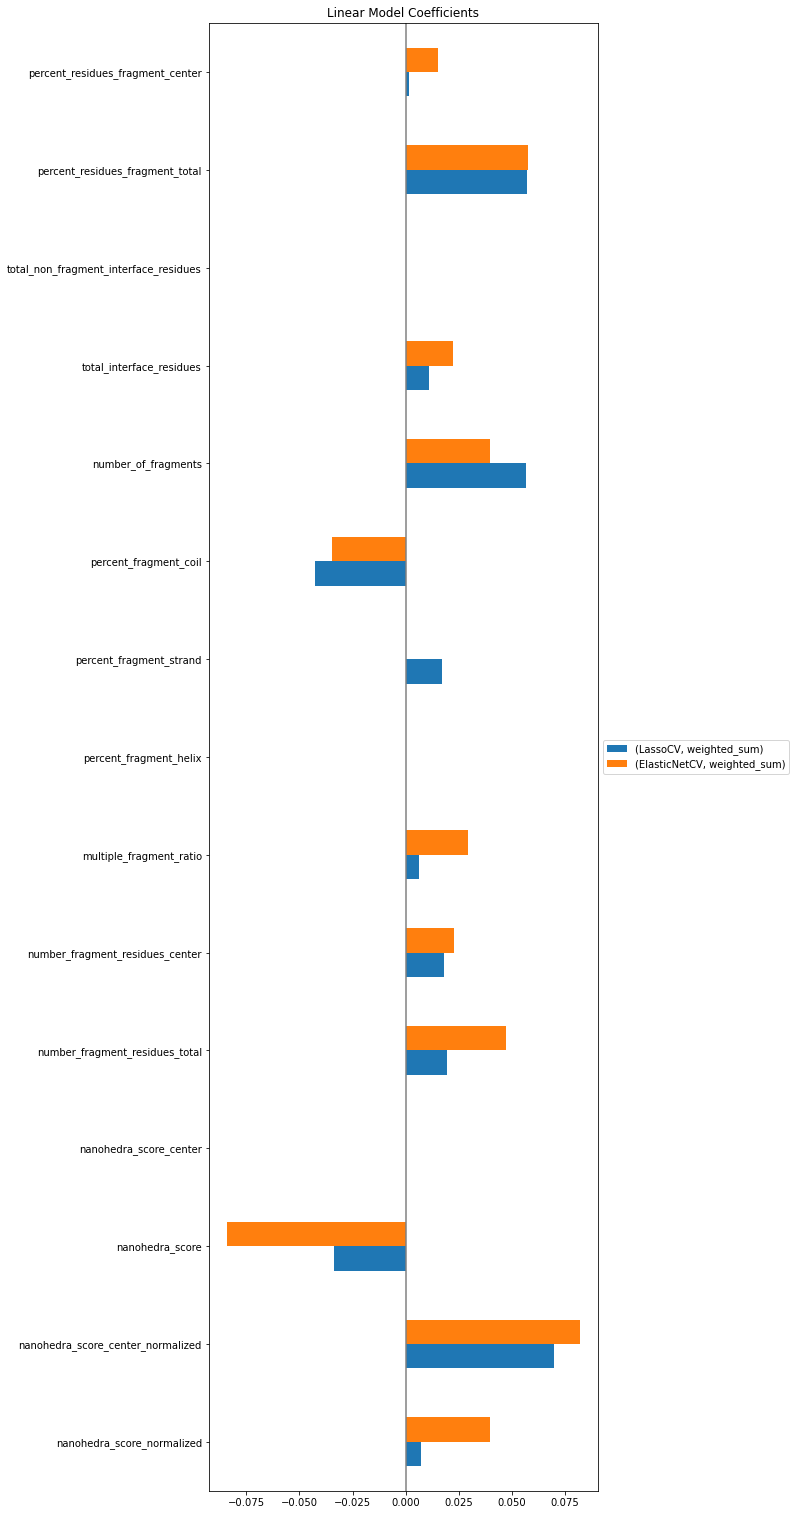

In [125]:
# ax = coefficient_df.loc[idx_slice[['MultiTaskElasticNetCV', 'ElasticNetCV'], :], :].T.plot(kind='barh', figsize=(9, 17))
# ax = coefficient_df.loc[idx_slice[['MultiTaskLassoCV', 'MultiTaskElasticNetCV'], :], :].T.plot(kind='barh', figsize=(9, 27))
ax = coefficient_df.loc[idx_slice[['LassoCV', 'ElasticNetCV'], :], :].T.plot(kind='barh', figsize=(9, 27))

plt.title('Linear Model Coefficients')
# plt.legend(loc='lower left')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Text(0.5, 0, 'Truths')

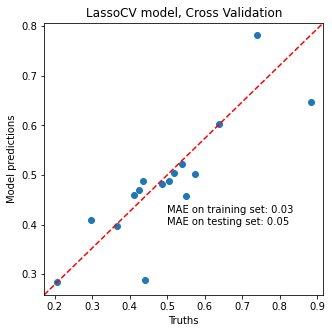

In [153]:
model_idx = 1
y_pred_train = models[model_idx].predict(trajectory_train_)

mae = median_absolute_error(target_train_, y_pred_train)
string_score = f'MAE on training set: {mae:.2f}'

target_test_prediction = models[model_idx].predict(trajectory_test_)
# mae = median_absolute_error(y_test, y_pred_test)
string_score += f'\nMAE on testing set: {mae_scores[model_idx]:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(target_test_, target_test_prediction)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(0.5, 0.4, string_score)
plt.title('%s model, Cross Validation' % list(possible_lin_reg.keys())[model_idx])
plt.ylabel('Model predictions')
plt.xlabel('Truths')

Text(0.5, 0, 'Truths')

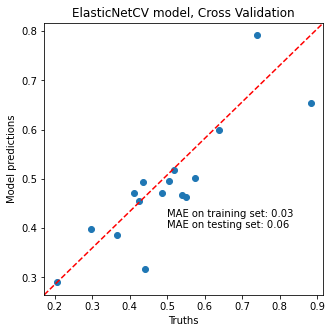

In [150]:
model_idx = 3
y_pred_train = models[model_idx].predict(trajectory_train_)

mae = median_absolute_error(target_train_, y_pred_train)
string_score = f'MAE on training set: {mae:.2f}'

target_test_prediction = models[model_idx].predict(trajectory_test_)
# mae = median_absolute_error(y_test, y_pred_test)
string_score += f'\nMAE on testing set: {mae_scores[model_idx]:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(target_test_, target_test_prediction)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(0.5, 0.4, string_score)
plt.title('%s model, Cross Validation' % list(possible_lin_reg.keys())[model_idx])
plt.ylabel('Model predictions')
plt.xlabel('Truths')

## This was coefficient analysis for the data before individual cluster trajectory weighting for SingleTask and before orientational inversion

In [21]:
# for idx, model in enumerate(models):
print(models[2].coef_, models[2].alpha_, models[2].l1_ratio_)
print(models[3].coef_, models[3].alpha_, models[3].l1_ratio_)
print(models[0].coef_, models[0].alpha_)
print(models[1].coef_, models[1].alpha_)

# print(models[1].coef_[:, np.newaxis])
pd.Series(models[1].coef_, index=nanohedra_metrics)

[[-0.0505819   0.00974604  0.          0.          0.28351948  0.06790319
  -0.03801343  0.         -0.07832777  0.12826676 -0.01662615 -0.20777733
  -0.12588667 -0.39949415 -0.45906072]
 [ 0.02396507  0.01584352  0.          0.         -0.00236704  0.27063295
  -0.04519105  0.         -0.03276501  0.08219598  0.00988126 -0.0020393
   0.0098284  -0.51105603 -0.28458109]
 [-0.01572616 -0.15289626  0.          0.          0.02235838  0.25973449
   0.04142863  0.          0.03284726 -0.12279305  0.05802658  0.13050585
  -0.19538129 -0.12360106 -0.08047522]
 [ 0.00504822 -0.14067543  0.          0.         -0.08400461  0.08277774
   0.07398706  0.          0.04726839 -0.00977635  0.03706068  0.24944759
   0.07580393 -0.23637186  0.04519595]
 [ 0.00072932 -0.02509739  0.          0.         -0.14240639 -0.09800012
   0.08027201  0.         -0.0254923   0.18342899  0.05244995 -0.43770626
  -0.27680872 -0.18140337 -0.18192824]] 0.1 0.5
[-0.          0.          0.          0.          0.     

nanohedra_score_per_res                 -0.000000
nanohedra_score_center_per_res_center   -0.000000
nanohedra_score                          0.000000
nanohedra_score_center                   0.000000
number_fragment_residues_total           0.000000
number_fragment_residues_center          0.000000
multiple_fragment_ratio                  0.015037
percent_fragment_helix                  -0.000000
percent_fragment_strand                  0.000000
percent_fragment_coil                   -0.000000
number_of_fragments                      0.014533
total_interface_residues                -0.000000
total_non_fragment_interface_residues   -0.000000
percent_residues_fragment_total          0.002876
percent_residues_fragment_center         0.002529
dtype: float64

In [23]:
no_multi_df = pd.concat([pd.Series(models[1].coef_, index=nanohedra_metrics), 
                         pd.Series(models[3].coef_, index=nanohedra_metrics)], axis=1, 
                        keys=list(zip([list(possible_lin_reg.keys())[1], list(possible_lin_reg.keys())[3]], repeat('weighted_sum'))))
# display(no_multi_df)
multi_df = pd.concat([pd.DataFrame(models[0].coef_, index=rosetta_metrics.keys(), columns=nanohedra_metrics), 
                      pd.DataFrame(models[2].coef_, index=rosetta_metrics.keys(), columns=nanohedra_metrics)],
                     keys=[list(possible_lin_reg.keys())[0], list(possible_lin_reg.keys())[2]])
coefficient_df = pd.concat([multi_df, no_multi_df.T])
#                                           if idx % 2 == 0 else ['weighted_sum'], 
#                             for idx, model in enumerate(models)])  # , keys=[possible_lin_reg])  # columns=[nanohedra_metrics]
display(coefficient_df)

nanohedra_score_per_res  \
MultiTaskLassoCV      shape_complementarity                           -0.049912   
                      interface_composition_similarity                 0.011008   
                      interface_energy                                -0.015595   
                      rmsd                                            -0.005965   
                      solvation_energy                                 0.015842   
MultiTaskElasticNetCV shape_complementarity                           -0.050582   
                      interface_composition_similarity                 0.023965   
                      interface_energy                                -0.015726   
                      rmsd                                             0.005048   
                      solvation_energy                                 0.000729   
LassoCV               weighted_sum                                    -0.000000   
ElasticNetCV          weighted_sum                                    -0.000000   

                                                        nanohedra_score_center_per_res_center  \
MultiTaskLassoCV      shape_complementarity                                          0.000000   
                      interface_composition_similarity                               0.000000   
                      interface_energy                                               0.000000   
                      rmsd                                                           0.000000   
                      solvation_energy                                               0.000000   
MultiTaskElasticNetCV shape_complementarity                                          0.009746   
                      interface_composition_similarity                               0.015844   
                      interface_energy                                              -0.152896   
                      rmsd                                                          -0.140675   
                      solvation_energy                                              -0.025097   
LassoCV               weighted_sum                                                  -0.000000   
ElasticNetCV          weighted_sum                                                   0.000000   

                                                        nanohedra_score  \
MultiTaskLassoCV      shape_complementarity                         0.0   
                      interface_composition_similarity              0.0   
                      interface_energy                              0.0   
                      rmsd                                          0.0   
                      solvation_energy                              0.0   
MultiTaskElasticNetCV shape_complementarity                         0.0   
                      interface_composition_similarity              0.0   
                      interface_energy                              0.0   
                      rmsd                                          0.0   
                      solvation_energy                              0.0   
LassoCV               weighted_sum                                  0.0   
ElasticNetCV          weighted_sum                                  0.0   

                                                        nanohedra_score_center  \
MultiTaskLassoCV      shape_complementarity                                0.0   
                      interface_composition_similarity                     0.0   
                      interface_energy                                     0.0   
                      rmsd                                                 0.0   
                      solvation_energy                                     0.0   
MultiTaskElasticNetCV shape_complementarity                                0.0   
                      interface_composition_similarity                     0.0   
                      interface_energy                                     0.0   


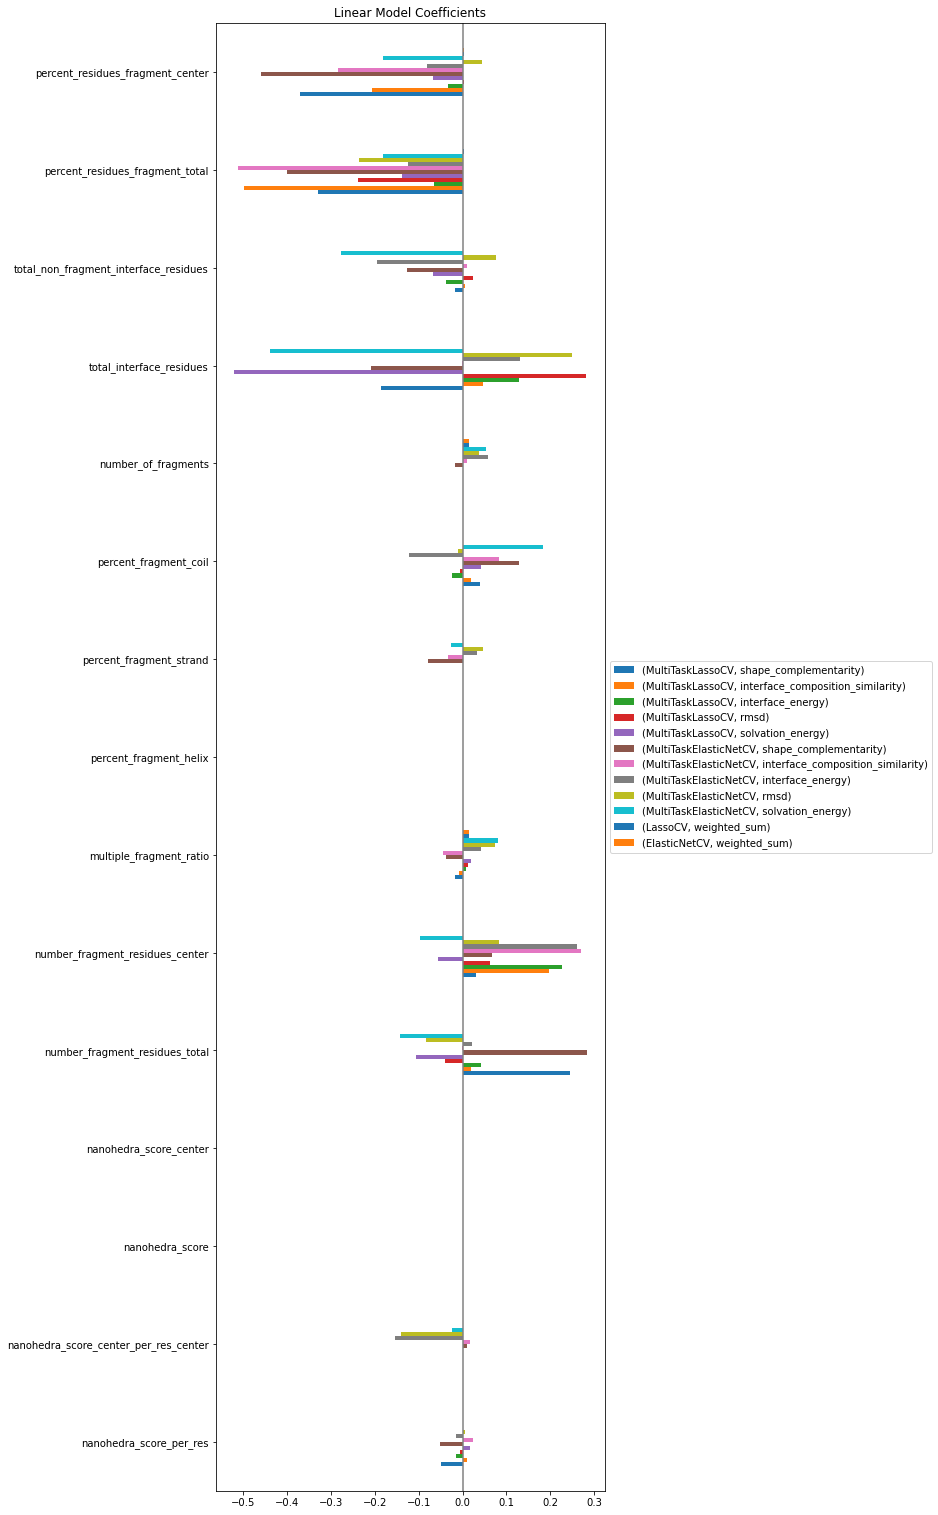

In [26]:
# ax = coefficient_df.loc[idx_slice[['MultiTaskElasticNetCV', 'ElasticNetCV'], :], :].T.plot(kind='barh', figsize=(9, 17))
ax = coefficient_df.loc[idx_slice[:, :], :].T.plot(kind='barh', figsize=(9, 27))

plt.title('Linear Model Coefficients')
# plt.legend(loc='lower left')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [98]:
y_pred_train = models[2].predict(trajectory_train_)
y_pred_test = models[2].predict(trajectory_test_)

# mae = median_absolute_error(target_train_, y_pred_train)
# string_score = f'MAE on training set: {mae:.2f}'
# y_pred_test = test_reg.predict(trajectory_test_)
# mae = median_absolute_error(y_test, y_pred_test)
string_score += f'\nMAE on testing set: {mae_scores[2]:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(target_test_, target_test_prediction)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(3, 20, string_score)
plt.title('MultiTaskElasticNet model, Cross Validation')
plt.ylabel('Model predictions')
plt.xlabel('Truths')

Text(0.5, 0, 'Truths')

# Model Validation and check for overfitting
This entire section used a different train_test_split state to see if the model above was overfitting to the training data when split in a different way.
The takeaway from the analysis is the at I need to train the model with more cross validation on the train test split front. The exposure to only one split biases the model. I will incorporate this into the next iteration and attempt to reach stable coefficients over the course of the validations.
Increasing the depth of data will help as well, so I have begun another deep trajectory design analysis section

In [172]:
# split training and test dataset
trajectory_train_VAL, trajectory_test_VAL, target_train_VAL, target_test_VAL = train_test_split(selected_nano_traj_df, target, random_state=2, stratify=target)
trajectory_train2d_VAL, trajectory_test2d_VAL, target_train2d_VAL, target_test2d_VAL = train_test_split(selected_nano_traj_df, targets2d,
                                                                                                        random_state=2, stratify=target)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [171]:
trajectory_test_VAL

pose  \
                                                                          nanohedra_score_normalized   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_241                  -0.750611   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                    0.903287   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_299                   0.453237   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413   3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                    -0.089068   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_281                   1.719528   
                                     2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_225                  -2.212125   
                                     2pd2_4n72-DEGEN_1_1-ROT_27_27-tx_203                   0.391814   
                                     2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_257                   0.063575   
                                     2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_208                  -1.953901   
                                     2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_212                  -2.135742   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                    1.237275   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_257                   0.275272   
                                     2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_263                   0.491551   
                                     2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_245                   0.327833   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_71                    0.817693   
                                     2gtr_2dj6-DEGEN_1_2-ROT_20_28-tx_68                   -1.313103   

                                                                                                             \
                                                                          nanohedra_score_center_normalized   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_241                         -0.647025   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_66                           0.781328   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_299                          0.293340   
3l3s_4g9q-DEGEN_1_1-ROT_7_2-tx_413   3l3s_4g9q-DEGEN_1_1-ROT_9_1-tx_424                            0.215160   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_281                          1.942242   
                                     2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_225                         -2.218642   
                                     2pd2_4n72-DEGEN_1_1-ROT_27_27-tx_203                          0.643998   
                                     2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_257                         -0.058084   
                                     2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_208                         -2.042998   
                                     2pd2_4n72-DEGEN_1_1-ROT_31_24-tx_212                         -1.980405   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gtr_2dj6-DEGEN_1_2-ROT_19_29-tx_72                           1.346699   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_257                          0.076006   
                                     2pd2_4n72-DEGEN_1_1-ROT_29_25-tx_263                          0.146539   
                                     2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_245                          0.308135   
2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_58  2gtr_2dj6-DEGEN_1_2-ROT_18_30-tx_71                           0.648233   
                                     2gtr_2dj6-DEGEN_1_2-ROT_20_28-tx_68                          -1.096298   

                                                                                           \
                                                                          nanohedra_score   
2pd2_4n72-DEGEN_1_1-ROT_28_26-tx_236 2

Text(0.5, 0, 'Truths')

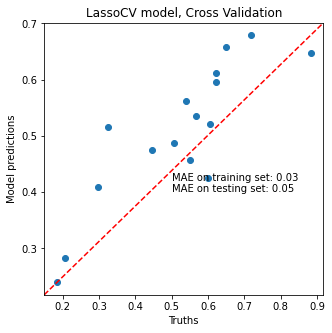

In [155]:
model_idx = 1
y_pred_train_VAL = models[model_idx].predict(trajectory_train_VAL)

mae = median_absolute_error(target_train_VAL, y_pred_train_VAL)
string_score = f'MAE on training set: {mae:.2f}'

target_test_prediction_VAL = models[model_idx].predict(trajectory_test_VAL)
# mae = median_absolute_error(y_test, y_pred_test)
string_score += f'\nMAE on testing set: {mae_scores[model_idx]:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(target_test_VAL, target_test_prediction_VAL)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(0.5, 0.4, string_score)
plt.title('%s model, Cross Validation' % list(possible_lin_reg.keys())[model_idx])
plt.ylabel('Model predictions')
plt.xlabel('Truths')

Text(0.5, 0, 'Truths')

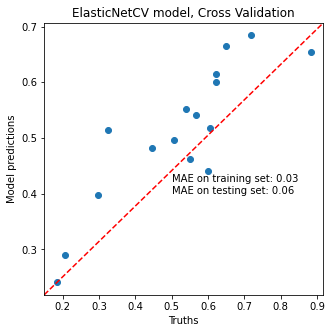

In [156]:
model_idx = 3
y_pred_train_VAL = models[model_idx].predict(trajectory_train_VAL)

mae = median_absolute_error(target_train_VAL, y_pred_train_VAL)
string_score = f'MAE on training set: {mae:.2f}'

target_test_prediction_VAL = models[model_idx].predict(trajectory_test_VAL)
# mae = median_absolute_error(y_test, y_pred_test)
string_score += f'\nMAE on testing set: {mae_scores[model_idx]:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(target_test_VAL, target_test_prediction_VAL)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(0.5, 0.4, string_score)
plt.title('%s model, Cross Validation' % list(possible_lin_reg.keys())[model_idx])
plt.ylabel('Model predictions')
plt.xlabel('Truths')

In [157]:
# Calculate model performance with cross-validation, alpha tuning
alphas = np.logspace(-10, 10, 21)  # Todo why log space here? BETTER parameter space
l1_ratios = [.1, .5, .7, .9, .95, .99, 1]
# then compare between models based on various model scoring parameters
reg_scores_VAL, mae_scores_VAL = [], []
models_VAL = []
for lin_reg, model in possible_lin_reg.items():
    if lin_reg.startswith('MultiTask'):
        trajectory_train_, trajectory_test_ = trajectory_train2d_VAL, trajectory_test2d_VAL
        target_train_, target_test_ = target_train2d_VAL, target_test2d_VAL
        print('MultiTask Model: %s' % lin_reg)
    else:
        trajectory_train_, trajectory_test_ = trajectory_train_VAL, trajectory_test_VAL
        target_train_, target_test_ = target_train_VAL, target_test_VAL
        print('Model: %s' % lin_reg)
    # else:
    #     target = target_train
    if lin_reg.startswith('ElasticNetCV'):
        test_reg = model(alphas=alphas, max_iter=10000, l1_ratio=l1_ratios).fit(trajectory_train_, target_train_)  # fit_intercept=False,
    else:
        test_reg = model(alphas=alphas, max_iter=10000).fit(trajectory_train_, target_train_)   # fit_intercept=False,
    reg_scores_VAL.append(test_reg.score(trajectory_train_, target_train_))
    target_test_prediction = test_reg.predict(trajectory_test_)  # target_test
    # for MultiTask, the median_absolute_error is a weighted average of all Task errors. multioutput='raw_values’ would provide each
    mae_scores_VAL.append(median_absolute_error(target_test_, target_test_prediction))
    models_VAL.append(test_reg)

MultiTask Model: MultiTaskLassoCV
Model: LassoCV
MultiTask Model: MultiTaskElasticNetCV
Model: ElasticNetCV


In [158]:
for idx, model in enumerate(models):
    print(reg_scores[idx], mae_scores[idx])  # models = []

0.35407708163399515 0.6351221542636988
0.8208480104074776 0.047367027056941846
0.3928776442473056 0.6482466079734173
0.8300791764584348 0.059220600252942096


Text(0.5, 0, 'Truths')

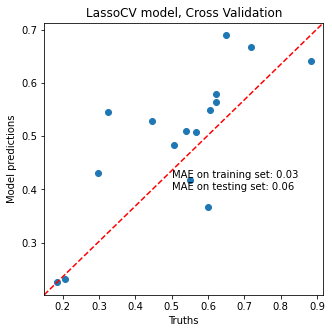

In [159]:
model_idx = 1
y_pred_train_VAL = models_VAL[model_idx].predict(trajectory_train_VAL)

mae = median_absolute_error(target_train_VAL, y_pred_train_VAL)
string_score = f'MAE on training set: {mae:.2f}'

target_test_prediction_VAL = models_VAL[model_idx].predict(trajectory_test_VAL)
# mae = median_absolute_error(y_test, y_pred_test)
string_score += f'\nMAE on testing set: {mae_scores_VAL[model_idx]:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(target_test_VAL, target_test_prediction_VAL)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(0.5, 0.4, string_score)
plt.title('%s model, Cross Validation' % list(possible_lin_reg.keys())[model_idx])
plt.ylabel('Model predictions')
plt.xlabel('Truths')

Text(0.5, 0, 'Truths')

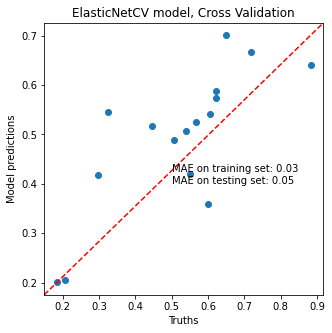

In [160]:
model_idx = 3
y_pred_train_VAL = models_VAL[model_idx].predict(trajectory_train_VAL)

mae = median_absolute_error(target_train_VAL, y_pred_train_VAL)
string_score = f'MAE on training set: {mae:.2f}'

target_test_prediction_VAL = models_VAL[model_idx].predict(trajectory_test_VAL)
# mae = median_absolute_error(y_test, y_pred_test)
string_score += f'\nMAE on testing set: {mae_scores_VAL[model_idx]:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(target_test_VAL, target_test_prediction_VAL)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(0.5, 0.4, string_score)
plt.title('%s model, Cross Validation' % list(possible_lin_reg.keys())[model_idx])
plt.ylabel('Model predictions')
plt.xlabel('Truths')

In [167]:
print(models[3].coef_)
print(models_VAL[3].coef_)

[ 0.03979515  0.08211509 -0.08428519  0.          0.04735407  0.02258651
  0.02946228  0.          0.         -0.03448775  0.03964175  0.02232523
 -0.          0.05775739  0.01513059]
[ 0.          0.02635187  0.          0.01508713  0.          0.
  0.03368271  0.          0.         -0.01023663  0.05125414  0.
 -0.          0.04128333  0.        ]


In [161]:
no_multi_df_VAL = pd.concat([pd.Series(models_VAL[1].coef_, index=nanohedra_metrics), 
                         pd.Series(models_VAL[3].coef_, index=nanohedra_metrics)], axis=1, 
                        keys=list(zip([list(possible_lin_reg.keys())[1], list(possible_lin_reg.keys())[3]], repeat('weighted_sum'))))
# display(no_multi_df)
multi_df_VAL = pd.concat([pd.DataFrame(models_VAL[0].coef_, index=rosetta_metrics.keys(), columns=nanohedra_metrics), 
                      pd.DataFrame(models_VAL[2].coef_, index=rosetta_metrics.keys(), columns=nanohedra_metrics)],
                     keys=[list(possible_lin_reg.keys())[0], list(possible_lin_reg.keys())[2]])
coefficient_df_VAL = pd.concat([multi_df_VAL, no_multi_df_VAL.T])
#                                           if idx % 2 == 0 else ['weighted_sum'], 
#                             for idx, model in enumerate(models)])  # , keys=[possible_lin_reg])  # columns=[nanohedra_metrics]
display(coefficient_df_VAL)

nanohedra_score_normalized  \
MultiTaskLassoCV      shape_complementarity                              -0.249794   
                      interface_composition_similarity                   -0.005796   
                      interface_energy                                   -0.137235   
                      rmsd                                                0.114493   
                      solvation_energy                                   -0.097832   
MultiTaskElasticNetCV shape_complementarity                              -0.277060   
                      interface_composition_similarity                    0.033610   
                      interface_energy                                   -0.116617   
                      rmsd                                                0.106587   
                      solvation_energy                                   -0.049051   
LassoCV               weighted_sum                                        0.000000   
ElasticNetCV          weighted_sum                                        0.000000   

                                                        nanohedra_score_center_normalized  \
MultiTaskLassoCV      shape_complementarity                                     -0.005567   
                      interface_composition_similarity                          -0.004308   
                      interface_energy                                          -0.054744   
                      rmsd                                                       0.042524   
                      solvation_energy                                          -0.010924   
MultiTaskElasticNetCV shape_complementarity                                      0.021226   
                      interface_composition_similarity                           0.010369   
                      interface_energy                                          -0.226510   
                      rmsd                                                       0.172436   
                      solvation_energy                                           0.001188   
LassoCV               weighted_sum                                               0.019689   
ElasticNetCV          weighted_sum                                               0.026352   

                                                        nanohedra_score  \
MultiTaskLassoCV      shape_complementarity                   -0.007406   
                      interface_composition_similarity        -0.049788   
                      interface_energy                        -0.092772   
                      rmsd                                     0.060185   
                      solvation_energy                        -0.034837   
MultiTaskElasticNetCV shape_complementarity                    0.025923   
                      interface_composition_similarity        -0.136127   
                      interface_energy                        -0.212713   
                      rmsd                                     0.112556   
                      solvation_energy                        -0.095946   
LassoCV               weighted_sum                             0.000000   
ElasticNetCV          weighted_sum                             0.000000   

                                                        nanohedra_score_center  \
MultiTaskLassoCV      shape_complementarity                           0.000000   
                      interface_composition_similarity                0.000000   
                      interface_energy                                0.000000   
                      rmsd                                            0.000000   
                      solvation_energy                                0.000000   
MultiTaskElasticNetCV shape_complementarity                           0.000000   
                      interface_composition_similarity                0.000000   
                      interface_energy                                0.000000   
             

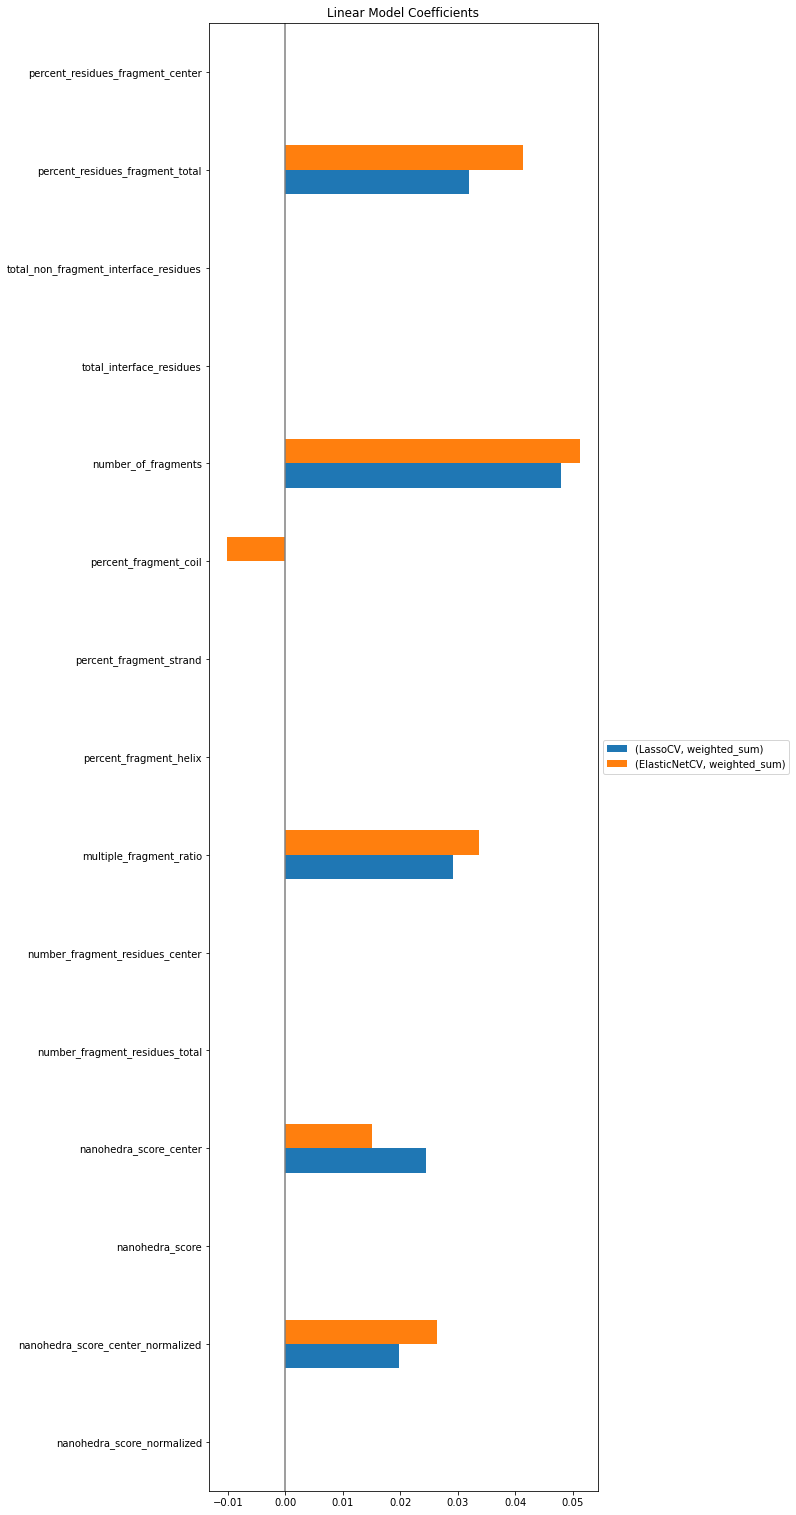

In [162]:
# ax = coefficient_df.loc[idx_slice[['MultiTaskElasticNetCV', 'ElasticNetCV'], :], :].T.plot(kind='barh', figsize=(9, 17))
# ax = coefficient_df.loc[idx_slice[['MultiTaskLassoCV', 'MultiTaskElasticNetCV'], :], :].T.plot(kind='barh', figsize=(9, 27))
ax = coefficient_df_VAL.loc[idx_slice[['LassoCV', 'ElasticNetCV'], :], :].T.plot(kind='barh', figsize=(9, 27))

plt.title('Linear Model Coefficients')
# plt.legend(loc='lower left')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

Text(0.5, 0, 'Truths')

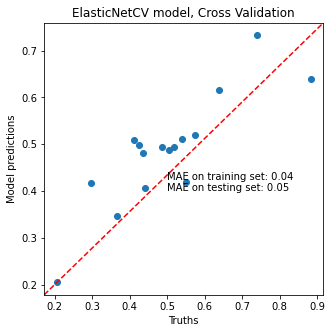

In [164]:
model_idx = 3
y_pred_train_VAL_VAL = models_VAL[model_idx].predict(trajectory_train)

mae = median_absolute_error(target_train, y_pred_train_VAL_VAL)
string_score = f'MAE on training set: {mae:.2f}'

target_test_prediction_VAL_VAL = models_VAL[model_idx].predict(trajectory_test)
# mae = median_absolute_error(y_test, y_pred_test)
string_score += f'\nMAE on testing set: {mae_scores_VAL[model_idx]:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(target_test, target_test_prediction_VAL_VAL)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(0.5, 0.4, string_score)
plt.title('%s model, Cross Validation' % list(possible_lin_reg.keys())[model_idx])
plt.ylabel('Model predictions')
plt.xlabel('Truths')

Text(0.5, 0, 'New Model, Original Split test')

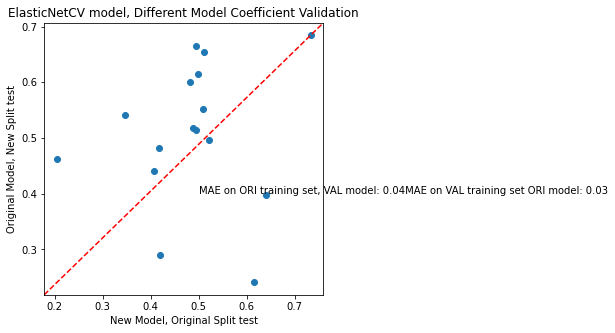

In [168]:
model_idx = 3
y_pred_train_VAL_ORI = models_VAL[model_idx].predict(trajectory_train)
y_pred_train_ORI_VAL = models[model_idx].predict(trajectory_train_VAL)

mae = median_absolute_error(target_train, y_pred_train_VAL_ORI)
string_score = f'MAE on ORI training set, VAL model: {mae:.2f}'
mae = median_absolute_error(target_train_VAL, y_pred_train_ORI_VAL)
string_score += f'\nMAE on VAL training set ORI model: {mae:.2f}'


target_test_prediction_VAL_ORI = models_VAL[model_idx].predict(trajectory_test)
target_test_prediction_ORI_VAL = models[model_idx].predict(trajectory_test_VAL)

# mae = median_absolute_error(y_test, y_pred_test)
# string_score += f'\nMAE on testing set: {mae_scores_VAL[model_idx]:.2f}'
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(target_test_prediction_VAL_ORI, target_test_prediction_ORI_VAL)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(0.5, 0.4, string_score)
plt.title('%s model, Different Model Coefficient Validation' % list(possible_lin_reg.keys())[model_idx])
plt.ylabel('Original Model, New Split test')
plt.xlabel('New Model, Original Split test')

# Checking the model on new data that doesn't have deep trajectories